In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
import pandas as pd
import json
from itertools import compress
import math

from scipy import signal 

import glob

from DataManager import ParticipantData, MeasurementData
from Helpers import read_normalized_json_to_df, save_to_disk, load_from_disk, create_rolling_windows, \
   intersection, reject_outliers, anglebetween, eye_outlier_removal_sigma, eye_outlier_removal_zero_values
from AngleHelpers import create_relative_directions

In [2]:
reference_data_all_failed_save_path = "./post_recorded_reference_data/reference_dict_all.pickle"
REFERENCE_DATA_ALL_EVENTS_FAILED = load_from_disk(reference_data_all_failed_save_path)

correlation_dict_path = "./post_recorded_reference_data/corr_dict.pickle"
CORRELATION_DICT = load_from_disk(correlation_dict_path)

# Load data

In [3]:
# global location variable 
GLOBAL_AREA = 'Westbrueck'  # orig Westbrueck
GLOBAL_SEGMENT = 0 # orig 0
GLOBAL_SINGLE_PARTICIPANT = '0bc17d704fec4a9eb892d905fc2e5da9'

In [4]:
verbose = False

eyes_paths  = ["./data/EyeTracking/"]
input_paths = ["./data/Input/"]
calib_paths = ["./data/ParticipantCalibrationData/"]
scene_paths = ["./data/SceneData/"]

measurement1 = MeasurementData(eyes_paths,input_paths,calib_paths,scene_paths,verbose)


ParticipantData: Initialising participant 0d0d7bd79b1a48d4ad5e757cdbfc15c9.
ParticipantData: Loaded data (bootstrapped) for participant 0d0d7bd79b1a48d4ad5e757cdbfc15c9.
ParticipantData: Initialising participant 0bc17d704fec4a9eb892d905fc2e5da9.
ParticipantData: Loaded data (bootstrapped) for participant 0bc17d704fec4a9eb892d905fc2e5da9.


In [5]:
measurement1.apply_reference_data(REFERENCE_DATA_ALL_EVENTS_FAILED)

 21%|██        | 430/2089 [00:00<00:00, 4298.11it/s]

MeasurementData: Applying reference data to all participants...
Creating relative directions considering roll.


 25%|██▍       | 522/2089 [00:00<00:00, 5216.34it/s]

Creating relative directions considering roll.


 25%|██▍       | 523/2131 [00:00<00:00, 5228.48it/s]

Creating relative directions considering roll.


 19%|█▉        | 415/2131 [00:00<00:00, 4149.91it/s]

Creating relative directions considering roll.


 30%|███       | 585/1932 [00:00<00:00, 5848.25it/s]

Creating relative directions considering roll.


 33%|███▎      | 639/1932 [00:00<00:00, 6381.36it/s]

Creating relative directions considering roll.


 72%|███████▏  | 1277/1767 [00:00<00:00, 6408.68it/s]

Creating relative directions considering roll.


 36%|███▌      | 638/1767 [00:00<00:00, 6378.33it/s]

Creating relative directions considering roll.


 36%|███▋      | 615/1691 [00:00<00:00, 6149.51it/s]

Creating relative directions considering roll.


 38%|███▊      | 635/1691 [00:00<00:00, 6342.19it/s]

Creating relative directions considering roll.


 22%|██▏       | 685/3131 [00:00<00:00, 6848.70it/s]

Creating relative directions considering roll.


 21%|██        | 654/3131 [00:00<00:00, 6537.19it/s]

Creating relative directions considering roll.


 16%|█▌        | 684/4347 [00:00<00:00, 6831.81it/s]

Creating relative directions considering roll.


 15%|█▌        | 665/4347 [00:00<00:00, 6647.87it/s]

Creating relative directions considering roll.


  0%|          | 0/1036 [00:00<?, ?it/s]

Creating relative directions considering roll.
Creating relative directions considering roll.


 38%|███▊      | 697/1839 [00:00<00:00, 6969.03it/s]

Creating relative directions considering roll.


 34%|███▍      | 625/1839 [00:00<00:00, 6249.77it/s]

Creating relative directions considering roll.


 21%|██        | 713/3443 [00:00<00:00, 7128.07it/s]

Creating relative directions considering roll.


 18%|█▊        | 629/3443 [00:00<00:00, 6280.39it/s]

Creating relative directions considering roll.


 28%|██▊       | 700/2505 [00:00<00:00, 6996.37it/s]

Creating relative directions considering roll.


 43%|████▎     | 1078/2505 [00:00<00:00, 5335.57it/s]

Creating relative directions considering roll.


 16%|█▌        | 675/4181 [00:00<00:00, 6749.39it/s]

Creating relative directions considering roll.


 15%|█▌        | 646/4181 [00:00<00:00, 6452.13it/s]

Creating relative directions considering roll.


 28%|██▊       | 667/2385 [00:00<00:00, 6662.14it/s]

Creating relative directions considering roll.


 45%|████▌     | 1083/2385 [00:00<00:00, 5497.14it/s]

Creating relative directions considering roll.


 44%|████▍     | 651/1477 [00:00<00:00, 6502.32it/s]

Creating relative directions considering roll.


 38%|███▊      | 568/1477 [00:00<00:00, 5674.09it/s]

Creating relative directions considering roll.


 13%|█▎        | 588/4435 [00:00<00:00, 5876.92it/s]

Creating relative directions considering roll.


 13%|█▎        | 594/4435 [00:00<00:00, 5939.45it/s]

Creating relative directions considering roll.


  0%|          | 0/2089 [00:00<?, ?it/s]

Creating relative directions considering roll.
Creating relative directions considering roll.
Creating relative directions considering roll.


 30%|███       | 632/2089 [00:00<00:00, 6318.42it/s]

Creating relative directions considering roll.


 28%|██▊       | 599/2131 [00:00<00:00, 5989.41it/s]

Creating relative directions considering roll.


 28%|██▊       | 606/2131 [00:00<00:00, 6059.51it/s]

Creating relative directions considering roll.


 31%|███▏      | 605/1932 [00:00<00:00, 6042.63it/s]

Creating relative directions considering roll.


 32%|███▏      | 618/1932 [00:00<00:00, 6175.25it/s]

Creating relative directions considering roll.


 38%|███▊      | 673/1767 [00:00<00:00, 6726.37it/s]

Creating relative directions considering roll.


 70%|███████   | 1243/1767 [00:00<00:00, 6215.56it/s]

Creating relative directions considering roll.


 37%|███▋      | 626/1691 [00:00<00:00, 6256.13it/s]

Creating relative directions considering roll.


 40%|███▉      | 673/1691 [00:00<00:00, 6725.90it/s]

Creating relative directions considering roll.


 21%|██        | 658/3131 [00:00<00:00, 6577.17it/s]

Creating relative directions considering roll.


 21%|██        | 660/3131 [00:00<00:00, 6594.93it/s]

Creating relative directions considering roll.


 15%|█▌        | 659/4347 [00:00<00:00, 6585.25it/s]

Creating relative directions considering roll.


 15%|█▍        | 642/4347 [00:00<00:00, 6417.94it/s]

Creating relative directions considering roll.


  0%|          | 0/1036 [00:00<?, ?it/s]

Creating relative directions considering roll.
Creating relative directions considering roll.


  3%|▎         | 57/1839 [00:00<00:04, 409.87it/s]

Creating relative directions considering roll.


 28%|██▊       | 507/1839 [00:00<00:00, 5063.73it/s]

Creating relative directions considering roll.


 12%|█▏        | 428/3443 [00:00<00:00, 4266.26it/s]

Creating relative directions considering roll.


 17%|█▋        | 602/3443 [00:00<00:00, 6018.93it/s]

Creating relative directions considering roll.


 27%|██▋       | 665/2505 [00:00<00:00, 6641.69it/s]

Creating relative directions considering roll.


 27%|██▋       | 684/2505 [00:00<00:00, 6835.77it/s]

Creating relative directions considering roll.


 16%|█▌        | 653/4181 [00:00<00:00, 6529.74it/s]

Creating relative directions considering roll.


  9%|▉         | 385/4181 [00:00<00:00, 3847.26it/s]

Creating relative directions considering roll.


 24%|██▍       | 583/2385 [00:00<00:00, 5822.30it/s]

Creating relative directions considering roll.


 17%|█▋        | 394/2385 [00:00<00:00, 3935.90it/s]

Creating relative directions considering roll.


 42%|████▏     | 614/1477 [00:00<00:00, 6132.71it/s]

Creating relative directions considering roll.


 34%|███▍      | 509/1477 [00:00<00:00, 5076.91it/s]

Creating relative directions considering roll.


 13%|█▎        | 573/4435 [00:00<00:00, 5727.71it/s]

Creating relative directions considering roll.


 13%|█▎        | 564/4435 [00:00<00:00, 5638.37it/s]

Creating relative directions considering roll.


100%|██████████| 153/153 [00:00<00:00, 4444.84it/s]

Creating relative directions considering roll.
Creating relative directions considering roll.
MeasurementData: Done applying reference data to all participants.


In [6]:
print("Available participants: \n" + str(measurement1.get_participant_list()))
print()

Available participants: 
['0d0d7bd79b1a48d4ad5e757cdbfc15c9', '0bc17d704fec4a9eb892d905fc2e5da9']



# Extract participant data

In [7]:
### Reference data applied 

# Extract data of one participant, of one area, of one segment 
participant_exclusion_list = [p for p in measurement1.get_participant_list() if p != GLOBAL_SINGLE_PARTICIPANT]
one_participant_single_segment = measurement1.get_data(use_vanilla=False, filter_data=True, \
                 filter_by_corr_coeff_dict=CORRELATION_DICT, corr_coeff_threshold=0.95, \
                 exclude_participants=participant_exclusion_list)
one_participant_single_segment = one_participant_single_segment[GLOBAL_SINGLE_PARTICIPANT][GLOBAL_AREA][GLOBAL_SEGMENT] 

# Average data over multiple sessions per segment
average_over_all_participants = measurement1.get_data(use_vanilla = False, filter_data=True, filter_by_corr_coeff_dict=CORRELATION_DICT, corr_coeff_threshold=0.95, exclude_participants=[])
average_over_all_participants = measurement1.average_data(average_over_all_participants)
average_over_all_participants_single_segment = average_over_all_participants[GLOBAL_AREA][GLOBAL_SEGMENT] 


/Users/stefan/opt/anaconda3/envs/Body2Eye/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [8]:
### No reference data applied 

# Extract data of one participant, of one area, of one segment without ref data applied 
participant_exclusion_list = [p for p in measurement1.get_participant_list() if p != GLOBAL_SINGLE_PARTICIPANT]
one_participant_single_segment_no_ref_applied = measurement1.get_data(use_vanilla=True, filter_data=True, \
                 filter_by_corr_coeff_dict=CORRELATION_DICT, corr_coeff_threshold=0.95, \
                 exclude_participants=participant_exclusion_list)
one_participant_single_segment_no_ref_applied = \
    one_participant_single_segment_no_ref_applied[GLOBAL_SINGLE_PARTICIPANT][GLOBAL_AREA][GLOBAL_SEGMENT]

# Extract reference data for one area, one segment 
ref_data_one_participant_single_segment = REFERENCE_DATA_ALL_EVENTS_FAILED[GLOBAL_AREA][GLOBAL_SEGMENT]  


In [9]:
print('X min/max ref: ' + str(round(one_participant_single_segment['EyeDirWorldCombined.x'].min(), 4)) + ', ' + str(round(one_participant_single_segment['EyeDirWorldCombined.x'].max(), 4)))
print('Y min/max ref: ' + str(round(one_participant_single_segment['EyeDirWorldCombined.y'].min(), 4)) + ', ' + str(round(one_participant_single_segment['EyeDirWorldCombined.y'].max(), 4)))
print('Z min/max ref: ' + str(round(one_participant_single_segment['EyeDirWorldCombined.z'].min(), 4)) + ', ' + str(round(one_participant_single_segment['EyeDirWorldCombined.z'].max(), 4)))

print('X min/max no ref: ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.x'].min(), 4)) + ', ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.x'].max(), 4)))
print('Y min/max no ref: ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.y'].min(), 4)) + ', ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.y'].max(), 4)))
print('Z min/max no ref: ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.z'].min(), 4)) + ', ' + str(round(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.z'].max(), 4)))

X min/max ref: -0.3467, 0.4961
Y min/max ref: -0.2484, 0.2362
Z min/max ref: 0.8676, 0.9998
X min/max no ref: -0.9925, 0.0
Y min/max no ref: -0.2756, 0.1382
Z min/max no ref: -0.763, 0.0


In [10]:
one_participant_single_segment

HmdPosition.x  HmdPosition.y  HmdPosition.z  NoseVector.x  NoseVector.y  \
0          0.905151       0.986206       0.341797      0.045545      0.314414   
1          0.905792       0.986412       0.342896      0.045278      0.313193   
2          0.906570       0.986832       0.344543      0.045037      0.311897   
3          0.907043       0.987122       0.345581      0.044860      0.310485   
4          0.907745       0.987663       0.347229      0.044684      0.309084   
...             ...            ...            ...           ...           ...   
2084       0.626536       1.005966      -0.043376      0.046852      0.307704   
2085       0.649343       1.004791      -0.025533      0.046039      0.308097   
2086       0.672150       1.003616      -0.007690      0.045226      0.308490   
2087       0.606842       1.007614      -0.058594      0.044445      0.308983   
2088       0.673523       1.003738      -0.006470      0.043934      0.309706   

      NoseVector.z  EyePosWorldCombined.x  EyePosWorldCombined.y  \
0         0.948193               0.918243               0.988144   
1         0.948610               0.919128               0.988358   
2         0.949048               0.920151               0.988785   
3         0.949519               0.921158               0.989059   
4         0.949984               0.922394               0.989586   
...            ...                    ...                    ...   
2084      0.950328               0.641408               1.007945   
2085      0.950240               0.664012               1.006673   
2086      0.950152               0.686615               1.005402   
2087      0.950029               0.620895               1.009529   
2088      0.949817               0.687164               1.005783   

      EyePosWorldCombined.z  EyeDirWorldCombined.x  EyeDirWorldCombined.y  \
0                  0.370483              -0.029951               0.114491   
1                  0.371216              -0.029669               0.113254   
2                  0.372498              -0.029363               0.111941   
3                  0.372803              -0.030387               0.109005   
4                  0.373718              -0.031402               0.106079   
...                     ...                    ...                    ...   
2084              -0.015584               0.075994               0.100736   
2085               0.002706               0.075697               0.101164   
2086               0.020996               0.075401               0.101592   
2087              -0.029114               0.073083               0.098187   
2088               0.023804               0.070978               0.095013   

      EyeDirWorldCombined.z  EyePosLocalCombined.x  EyePosLocalCombined.y  \
0                  0.992973               0.001685               0.003763   
1                  0.993123               0.001229               0.003744   
2                  0.993281               0.000773               0.003725   
3                  0.993577              -0.000164               0.003689   
4                  0.993862              -0.001101               0.003654   
...                     ...                    ...                    ...   
2084               0.992007               0.002051               0.003975   
2085               0.991986               0.002622               0.003997   
2086               0.991965               0.003194               0.004019   
2087               0.992481               0.004149               0.004053   
2088               0.992942               0.005104               0.004087   

      EyePosLocalCombined.z  EyeDirLocalCombined.x  EyeDirLocalCombined.y  \
0                 -0.033151              -0.088638              -0.199326   
1                 -0.033073              -0.088036              -0.199593   
2                 -0.032995              -0.087433              -0.199860   
3                 -0.032832              -0.088242        

# Check unit length of directions

Min value: 0.9999999999999998
Max value: 1.0000000000000002


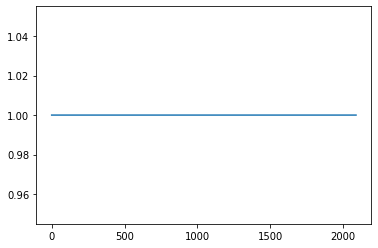

In [11]:
vector_lengths = list()

for ii in range(len(one_participant_single_segment)):
    vector_lengths.append(np.linalg.norm([one_participant_single_segment['NoseVector.x'][ii],
                                          one_participant_single_segment['NoseVector.y'][ii],
                                          one_participant_single_segment['NoseVector.z'][ii]]))
                
plt.plot(vector_lengths)
print('Min value: ' + str(min(vector_lengths)))
print('Max value: ' + str(max(vector_lengths)))

# Investigating outliers in vanilla data

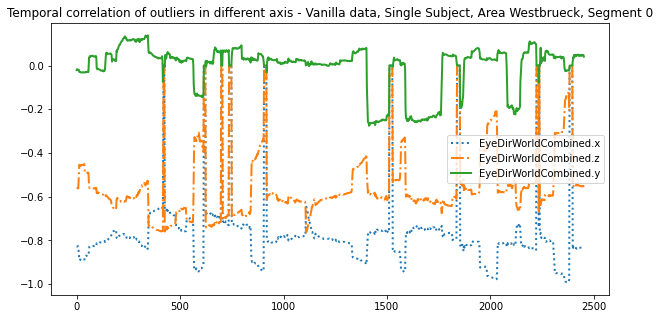

In [12]:
plt.figure(figsize=(10,5))
plt.plot(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.x'], linewidth=2, linestyle=':')
plt.plot(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.z'], linewidth=2, linestyle='-.')
plt.plot(one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.y'], linewidth=2)

plt.title("Temporal correlation of outliers in different axis - Vanilla data, Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT))
plt.legend(['EyeDirWorldCombined.x', 'EyeDirWorldCombined.z', 'EyeDirWorldCombined.y'])
plt.show()

Outlier detection Method: Standard Deviation
Overwritten data: 3.913575214023645%


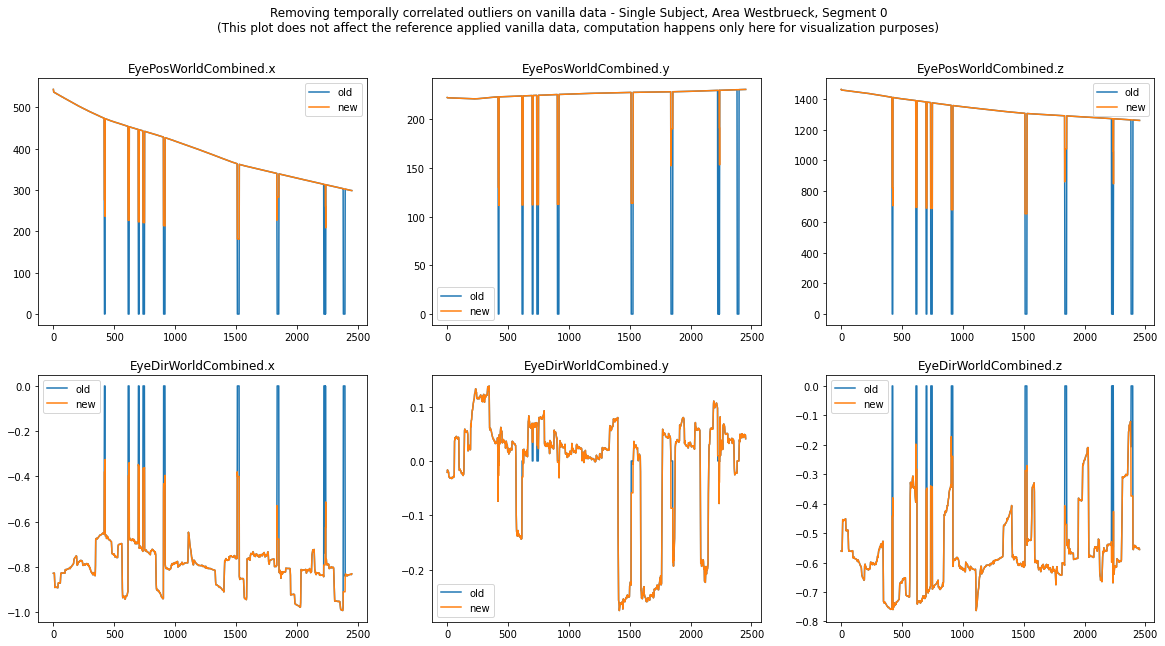

In [13]:
old_pos_x = one_participant_single_segment_no_ref_applied['EyePosWorldCombined.x']
old_pos_y = one_participant_single_segment_no_ref_applied['EyePosWorldCombined.y']
old_pos_z = one_participant_single_segment_no_ref_applied['EyePosWorldCombined.z']

old_dir_x = one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.x']
old_dir_y = one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.y']
old_dir_z = one_participant_single_segment_no_ref_applied['EyeDirWorldCombined.z']

'''
pos_x, pos_y, pos_z, dir_x, dir_y, dir_z, info, outliers = \
    eye_outlier_removal_zero_values(old_pos_x, old_pos_y, old_pos_z, old_dir_x, old_dir_y, old_dir_z, padding=8)
print("Outlier detection Method: Zero Values with padding")
print("Overwritten data: " + str(info["Amount of data (incl. padding) (%)"].sum()) + "%")
'''

pos_x, pos_y, pos_z, dir_x, dir_y, dir_z, info, outliers = \
    eye_outlier_removal_sigma(old_pos_x, old_pos_y, old_pos_z, old_dir_x, old_dir_y, old_dir_z, m=2)
print("Outlier detection Method: Standard Deviation")
print("Overwritten data: " + str(info["Data Prop (%)"].sum()) + "%")


plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot(old_pos_x)
plt.plot(pos_x)
plt.legend(["old","new"])
plt.title('EyePosWorldCombined.x')

plt.subplot(2,3,2)
plt.plot(old_pos_y)
plt.plot(pos_y)
plt.legend(["old","new"])
plt.title('EyePosWorldCombined.y')

plt.subplot(2,3,3)
plt.plot(old_pos_z)
plt.plot(pos_z)
plt.legend(["old","new"])
plt.title('EyePosWorldCombined.z')

plt.subplot(2,3,4)
plt.plot(old_dir_x)
plt.plot(dir_x)
plt.legend(["old","new"])
plt.title('EyeDirWorldCombined.x')

plt.subplot(2,3,5)
plt.plot(old_dir_y)
plt.plot(dir_y)
plt.legend(["old","new"])
plt.title('EyeDirWorldCombined.y')

plt.subplot(2,3,6)
plt.plot(old_dir_z)
plt.plot(dir_z)
plt.legend(["old","new"])
plt.title('EyeDirWorldCombined.z')

plt.suptitle("Removing temporally correlated outliers on vanilla data - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT) \
            + "\n(This plot does not affect the reference applied vanilla data, computation happens only here for visualization purposes)")

plt.show()

# Comparing vanilla & reference data applied & reference data

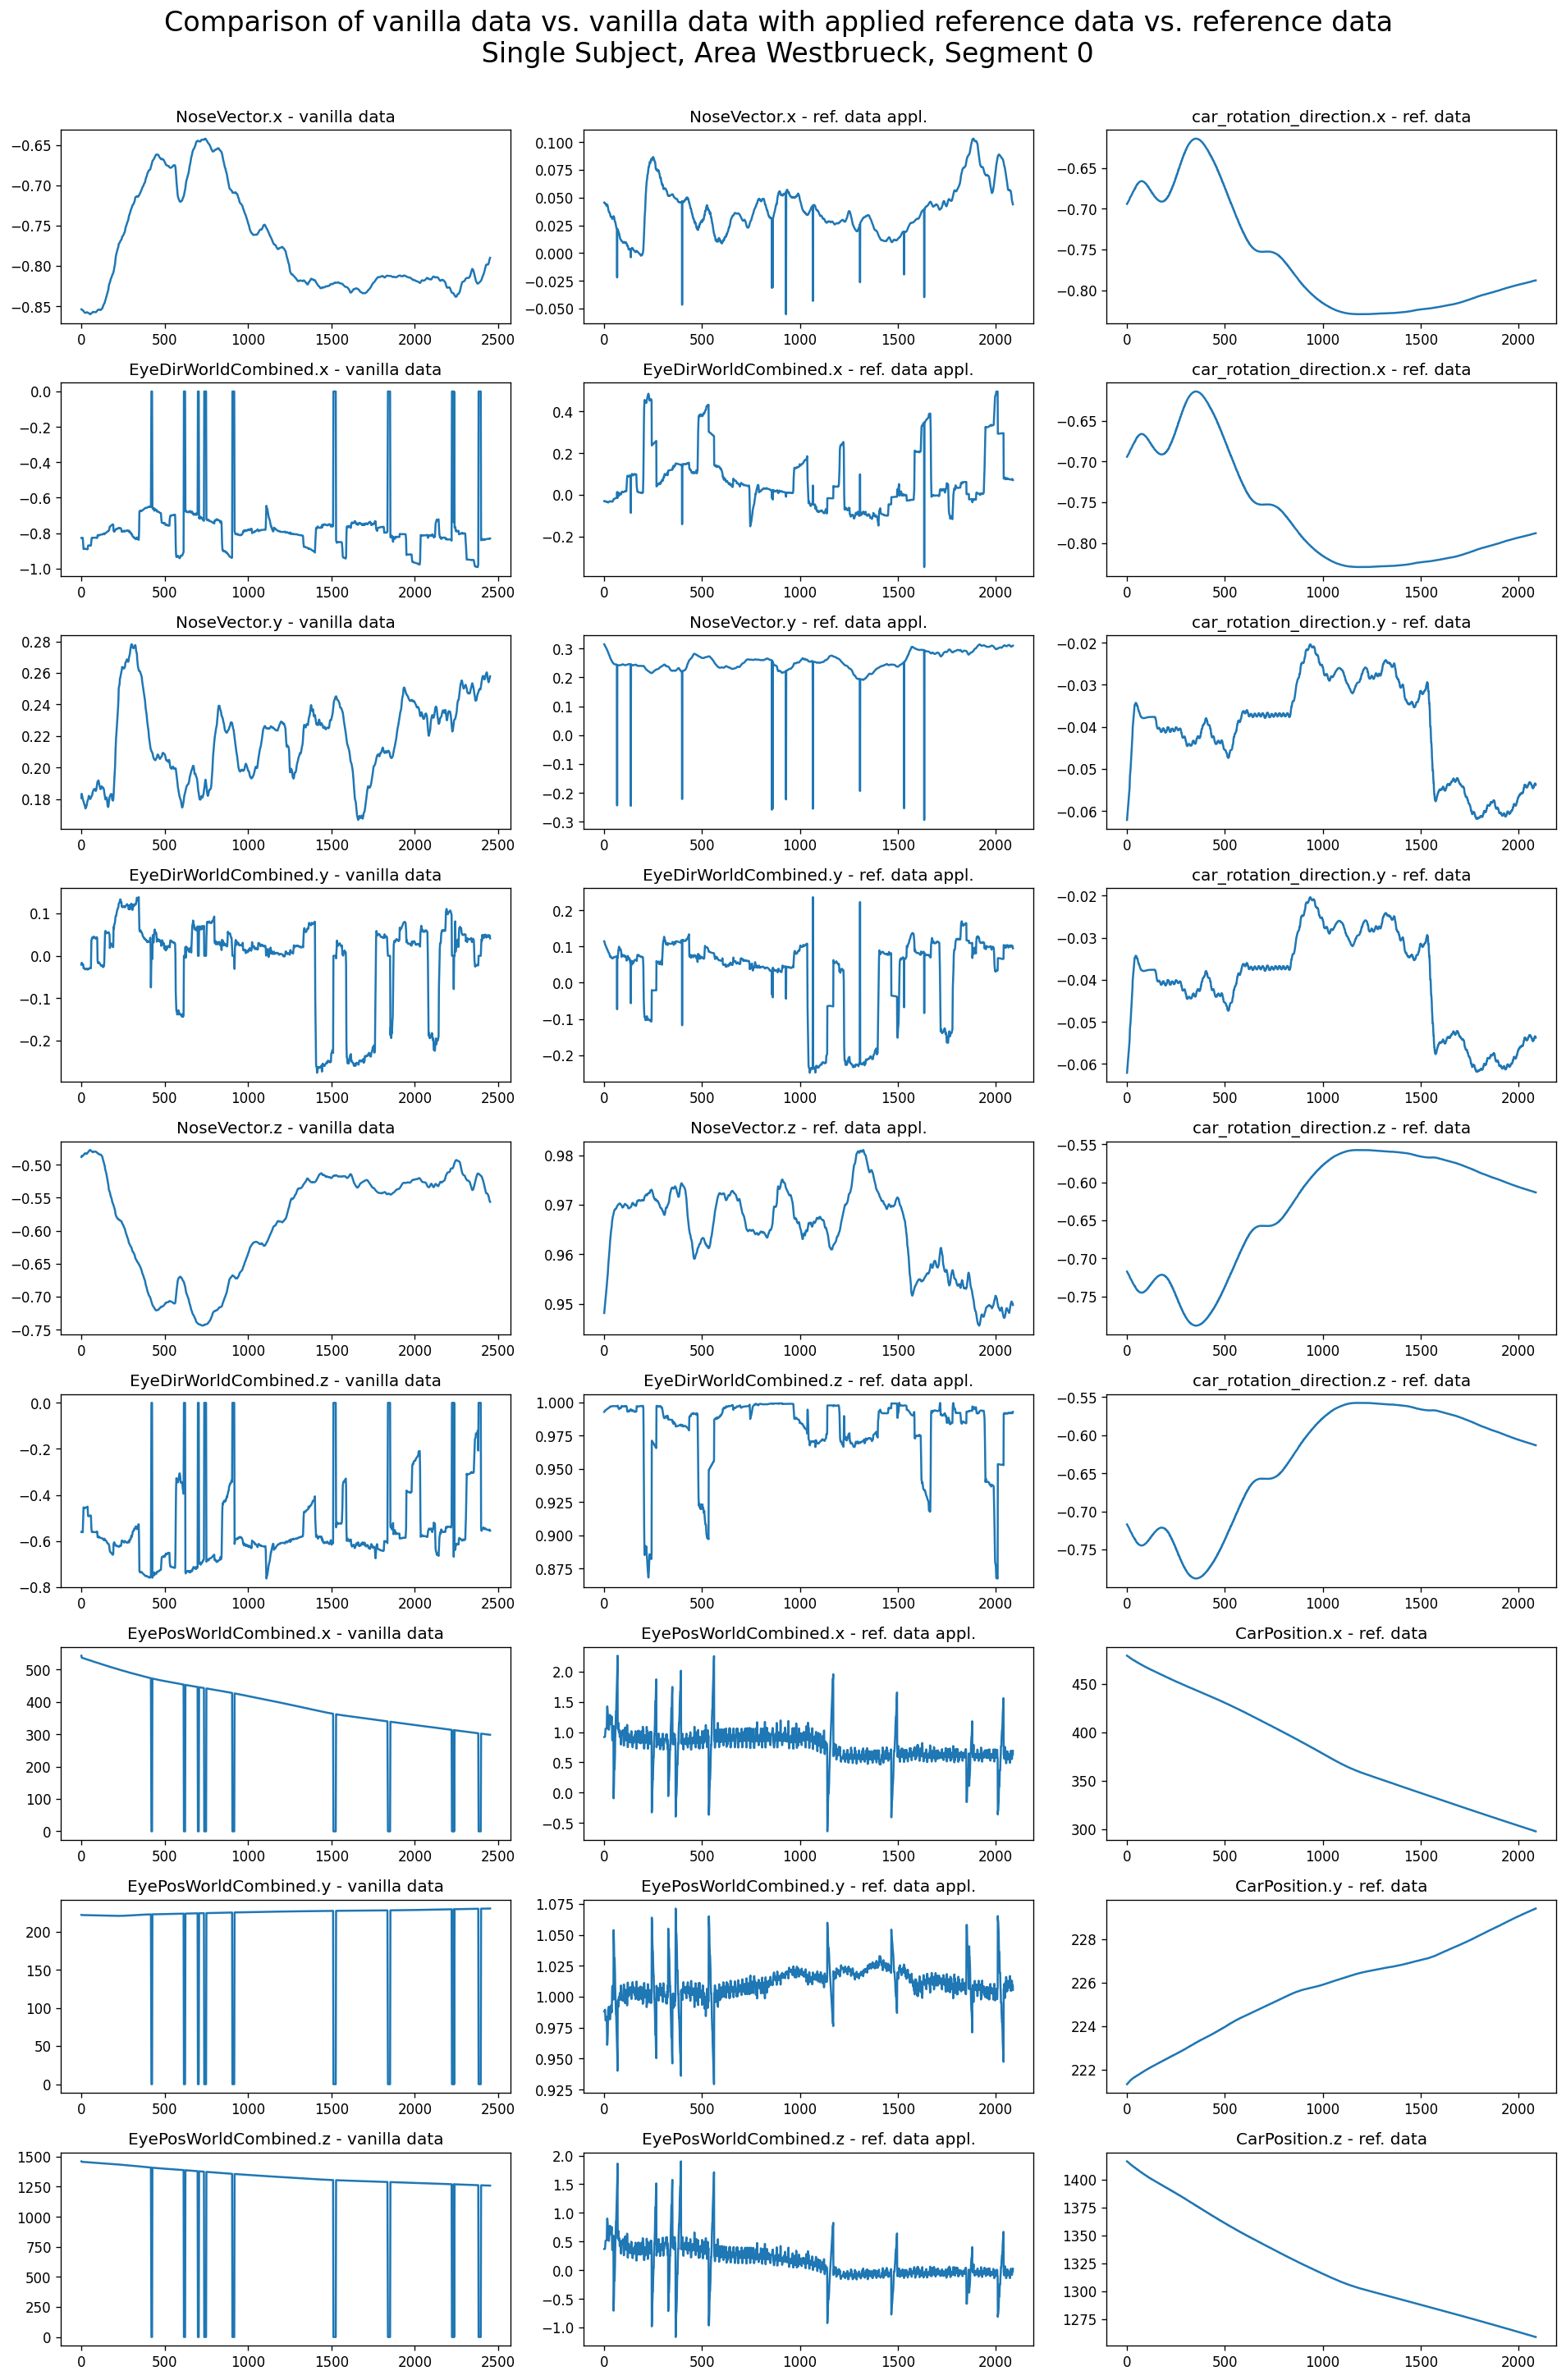

In [14]:
# Names of data columns to plot 
names_x = ["NoseVector.x","NoseVector.x",'car_rotation_direction.x',"EyeDirWorldCombined.x","EyeDirWorldCombined.x",'car_rotation_direction.x', \
           "NoseVector.y","NoseVector.y",'car_rotation_direction.y',"EyeDirWorldCombined.y","EyeDirWorldCombined.y",'car_rotation_direction.y', \
           "NoseVector.z","NoseVector.z",'car_rotation_direction.z',"EyeDirWorldCombined.z","EyeDirWorldCombined.z",'car_rotation_direction.z', \
           'EyePosWorldCombined.x','EyePosWorldCombined.x','CarPosition.x', \
           'EyePosWorldCombined.y','EyePosWorldCombined.y','CarPosition.y', \
           'EyePosWorldCombined.z','EyePosWorldCombined.z','CarPosition.z']

# plot comparison 
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(16,24), dpi=120)

for idx, row in enumerate(ax.reshape(-1)):
    
    # First column: Vanilla data 
    if idx % 3 == 0:
        
        x = one_participant_single_segment_no_ref_applied[names_x[idx]]
        row.plot(x)
        row.set_title(names_x[idx] + " - vanilla data")
        
    # Second column: Vanilla + reference data applied 
    elif idx % 3 == 1:
        
        x = one_participant_single_segment[names_x[idx]]
        row.plot(x)
        row.set_title(names_x[idx] + " - ref. data appl.")
    
    # Third column: Reference data
    elif idx % 3 == 2:
        
        x = ref_data_one_participant_single_segment[names_x[idx]] 
        row.plot(x)
        row.set_title(names_x[idx] + " - ref. data")


fig.suptitle("Comparison of vanilla data vs. vanilla data with applied reference data vs. reference data \n Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT),fontsize=20, y=1.005)
    
fig.tight_layout() 
plt.show()

# Sanity Check Eye-Directions



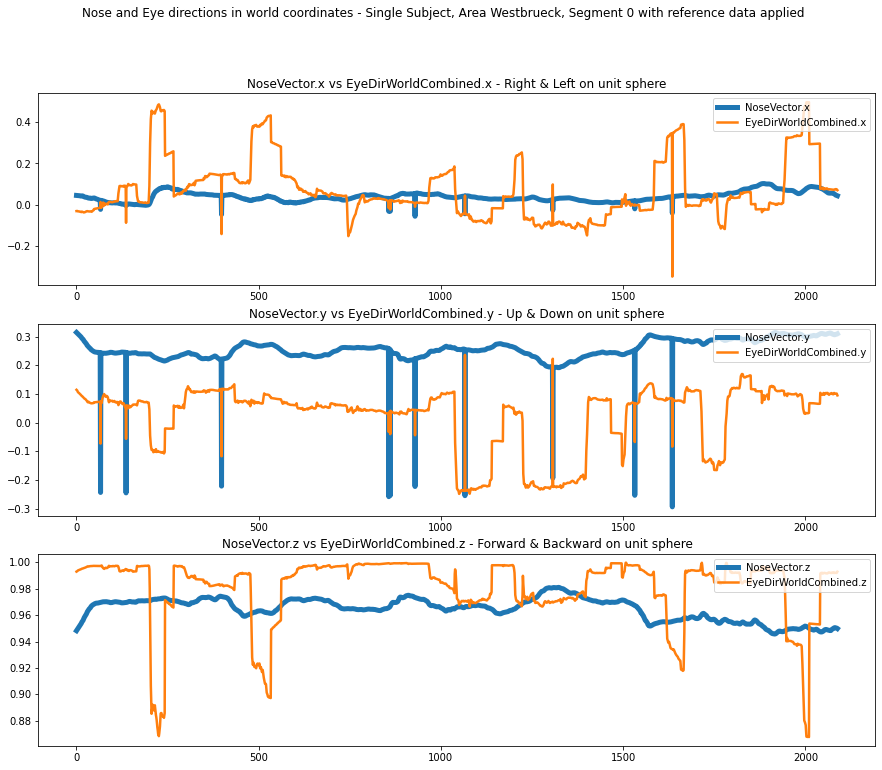

In [15]:
# X
nose_x= one_participant_single_segment['NoseVector.x'] 
eye_x = one_participant_single_segment['EyeDirWorldCombined.x'] 

# Y
nose_y = one_participant_single_segment['NoseVector.y']
eye_y = one_participant_single_segment['EyeDirWorldCombined.y']

# Z
nose_z = one_participant_single_segment['NoseVector.z']
eye_z = one_participant_single_segment['EyeDirWorldCombined.z']

# Plot 
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
plt.title('NoseVector.x vs EyeDirWorldCombined.x - Right & Left on unit sphere')

plt.plot(nose_x, linewidth=5, label='NoseVector.x')
plt.plot(eye_x, linewidth=2.5, label='EyeDirWorldCombined.x')
plt.legend(loc="upper right")

plt.subplot(3,1,2)
plt.title('NoseVector.y vs EyeDirWorldCombined.y - Up & Down on unit sphere')
plt.plot(nose_y, linewidth=5,label='NoseVector.y')
plt.plot(eye_y, linewidth=2.5, label='EyeDirWorldCombined.y')
plt.legend(loc="upper right")

plt.subplot(3,1,3)
plt.title('NoseVector.z vs EyeDirWorldCombined.z - Forward & Backward on unit sphere')
plt.plot(nose_z, linewidth=5, label='NoseVector.z')
plt.plot(eye_z, linewidth=2.5, label='EyeDirWorldCombined.z')
plt.legend(loc="upper right")

plt.suptitle("Nose and Eye directions in world coordinates - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT) + " with reference data applied")

plt.show()

In [16]:
'''
* Unity coordinate system (z is forward)

    /\ y
    |
    |    /\ z (forward)
    |    /
    |   /  
    |  /
    | /
    |------------>   x
    /
   /|
  / | 

'''

'\n* Unity coordinate system (z is forward)\n\n    /\\ y\n    |\n    |    /\\ z (forward)\n    |    /\n    |   /  \n    |  /\n    | /\n    |------------>   x\n    /\n   /|\n  / | \n\n'

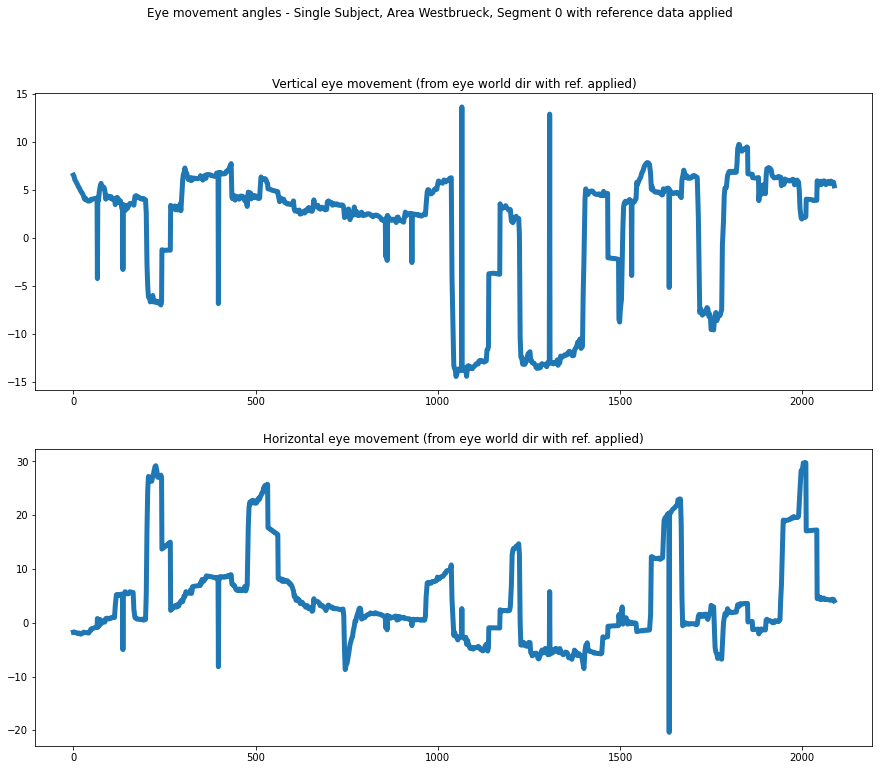

In [17]:
# Compute horizontal and vertical thetas (eye movement angles)
# From eye world dir 


# Angles 
theta_vertical = np.arctan2(one_participant_single_segment['EyeDirWorldCombined.y'],one_participant_single_segment['EyeDirWorldCombined.z']) * 360 / 2 / np.pi
theta_horizontal = np.arctan2(one_participant_single_segment['EyeDirWorldCombined.x'],one_participant_single_segment['EyeDirWorldCombined.z']) * 360 / 2 / np.pi

# Plot 
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.title('Vertical eye movement (from eye world dir with ref. applied)')
plt.plot(theta_vertical, linewidth=5)

plt.subplot(2,1,2)
plt.title('Horizontal eye movement (from eye world dir with ref. applied)')
plt.plot(theta_horizontal, linewidth=5)

plt.suptitle("Eye movement angles - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT) + " with reference data applied")

plt.show()

In [18]:
one_participant_single_segment.columns

Index(['HmdPosition.x', 'HmdPosition.y', 'HmdPosition.z', 'NoseVector.x',
       'NoseVector.y', 'NoseVector.z', 'EyePosWorldCombined.x',
       'EyePosWorldCombined.y', 'EyePosWorldCombined.z',
       'EyeDirWorldCombined.x', 'EyeDirWorldCombined.y',
       'EyeDirWorldCombined.z', 'EyePosLocalCombined.x',
       'EyePosLocalCombined.y', 'EyePosLocalCombined.z',
       'EyeDirLocalCombined.x', 'EyeDirLocalCombined.y',
       'EyeDirLocalCombined.z', 'resampled_timestamp', 'is_interpolated'],
      dtype='object')

 29%|██▉       | 606/2089 [00:00<00:00, 6055.59it/s]

Creating relative directions, method: anglediff_sphere_coords


100%|██████████| 2089/2089 [00:00<00:00, 3489.51it/s]


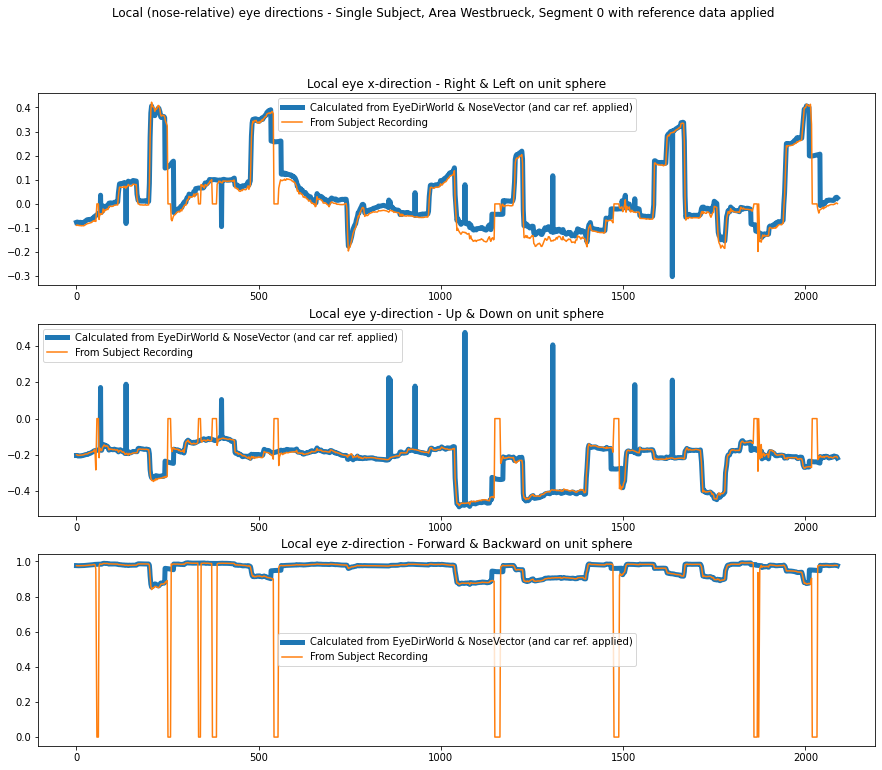

In [19]:
# Investigate "local eye direction" from data (with ref. applied) vs difference between Eye Direction World and Nose Vector (via AngleHelper rotation)

inp_unity_x = one_participant_single_segment['EyeDirWorldCombined.x']
inp_unity_y = one_participant_single_segment['EyeDirWorldCombined.y']
inp_unity_z = one_participant_single_segment['EyeDirWorldCombined.z']
ref_unity_x = one_participant_single_segment['NoseVector.x']
ref_unity_y = one_participant_single_segment['NoseVector.y']
ref_unity_z = one_participant_single_segment['NoseVector.z']

localized_x, localized_y, localized_z = create_relative_directions(inp_unity_x,inp_unity_y,inp_unity_z,ref_unity_x,ref_unity_y,ref_unity_z,method="anglediff_sphere_coords")
                    

# Plot 
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
plt.title('Local eye x-direction - Right & Left on unit sphere')
plt.plot(localized_x, linewidth=5)
plt.plot(one_participant_single_segment['EyeDirLocalCombined.x'])
plt.legend(["Calculated from EyeDirWorld & NoseVector (and car ref. applied)","From Subject Recording"])

plt.subplot(3,1,2)
plt.title('Local eye y-direction - Up & Down on unit sphere')
plt.plot(localized_y, linewidth=5)
plt.plot(one_participant_single_segment['EyeDirLocalCombined.y'])
plt.legend(["Calculated from EyeDirWorld & NoseVector (and car ref. applied)","From Subject Recording"])

plt.subplot(3,1,3)
plt.title('Local eye z-direction - Forward & Backward on unit sphere')
plt.plot(localized_z, linewidth=5)
plt.plot(one_participant_single_segment['EyeDirLocalCombined.z'])
plt.legend(["Calculated from EyeDirWorld & NoseVector (and car ref. applied)","From Subject Recording"])

plt.suptitle("Local (nose-relative) eye directions - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT) + " with reference data applied")

plt.show()

# Power Spectral Density Analysis
Using Welch's method

In [20]:
def plot_power_spectral_densities(segment_data,names_x,plt_title,fig_size,nrows,ncols,x_lim=-1,y_lim=-1):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=fig_size, dpi=120)
    
    for idx, row in enumerate(ax.reshape(-1)):
        x = segment_data[names_x[idx]]
        f, pxx_den = signal.welch(x,fs=(1/0.01),nperseg=2048)
        row.semilogy(f, pxx_den)
        row.set_xlabel('Frequency [Hz]')
        row.set_ylabel('PSD [degree**2/Hz]')
        if x_lim > 0:
            row.set_xlim(0,x_lim)
        if y_lim > 0:
            row.set_ylim(0,y_lim)
        row.set_title(names_x[idx])

    fig.suptitle(plt_title, y=1.005)
    fig.tight_layout()
    plt.show()


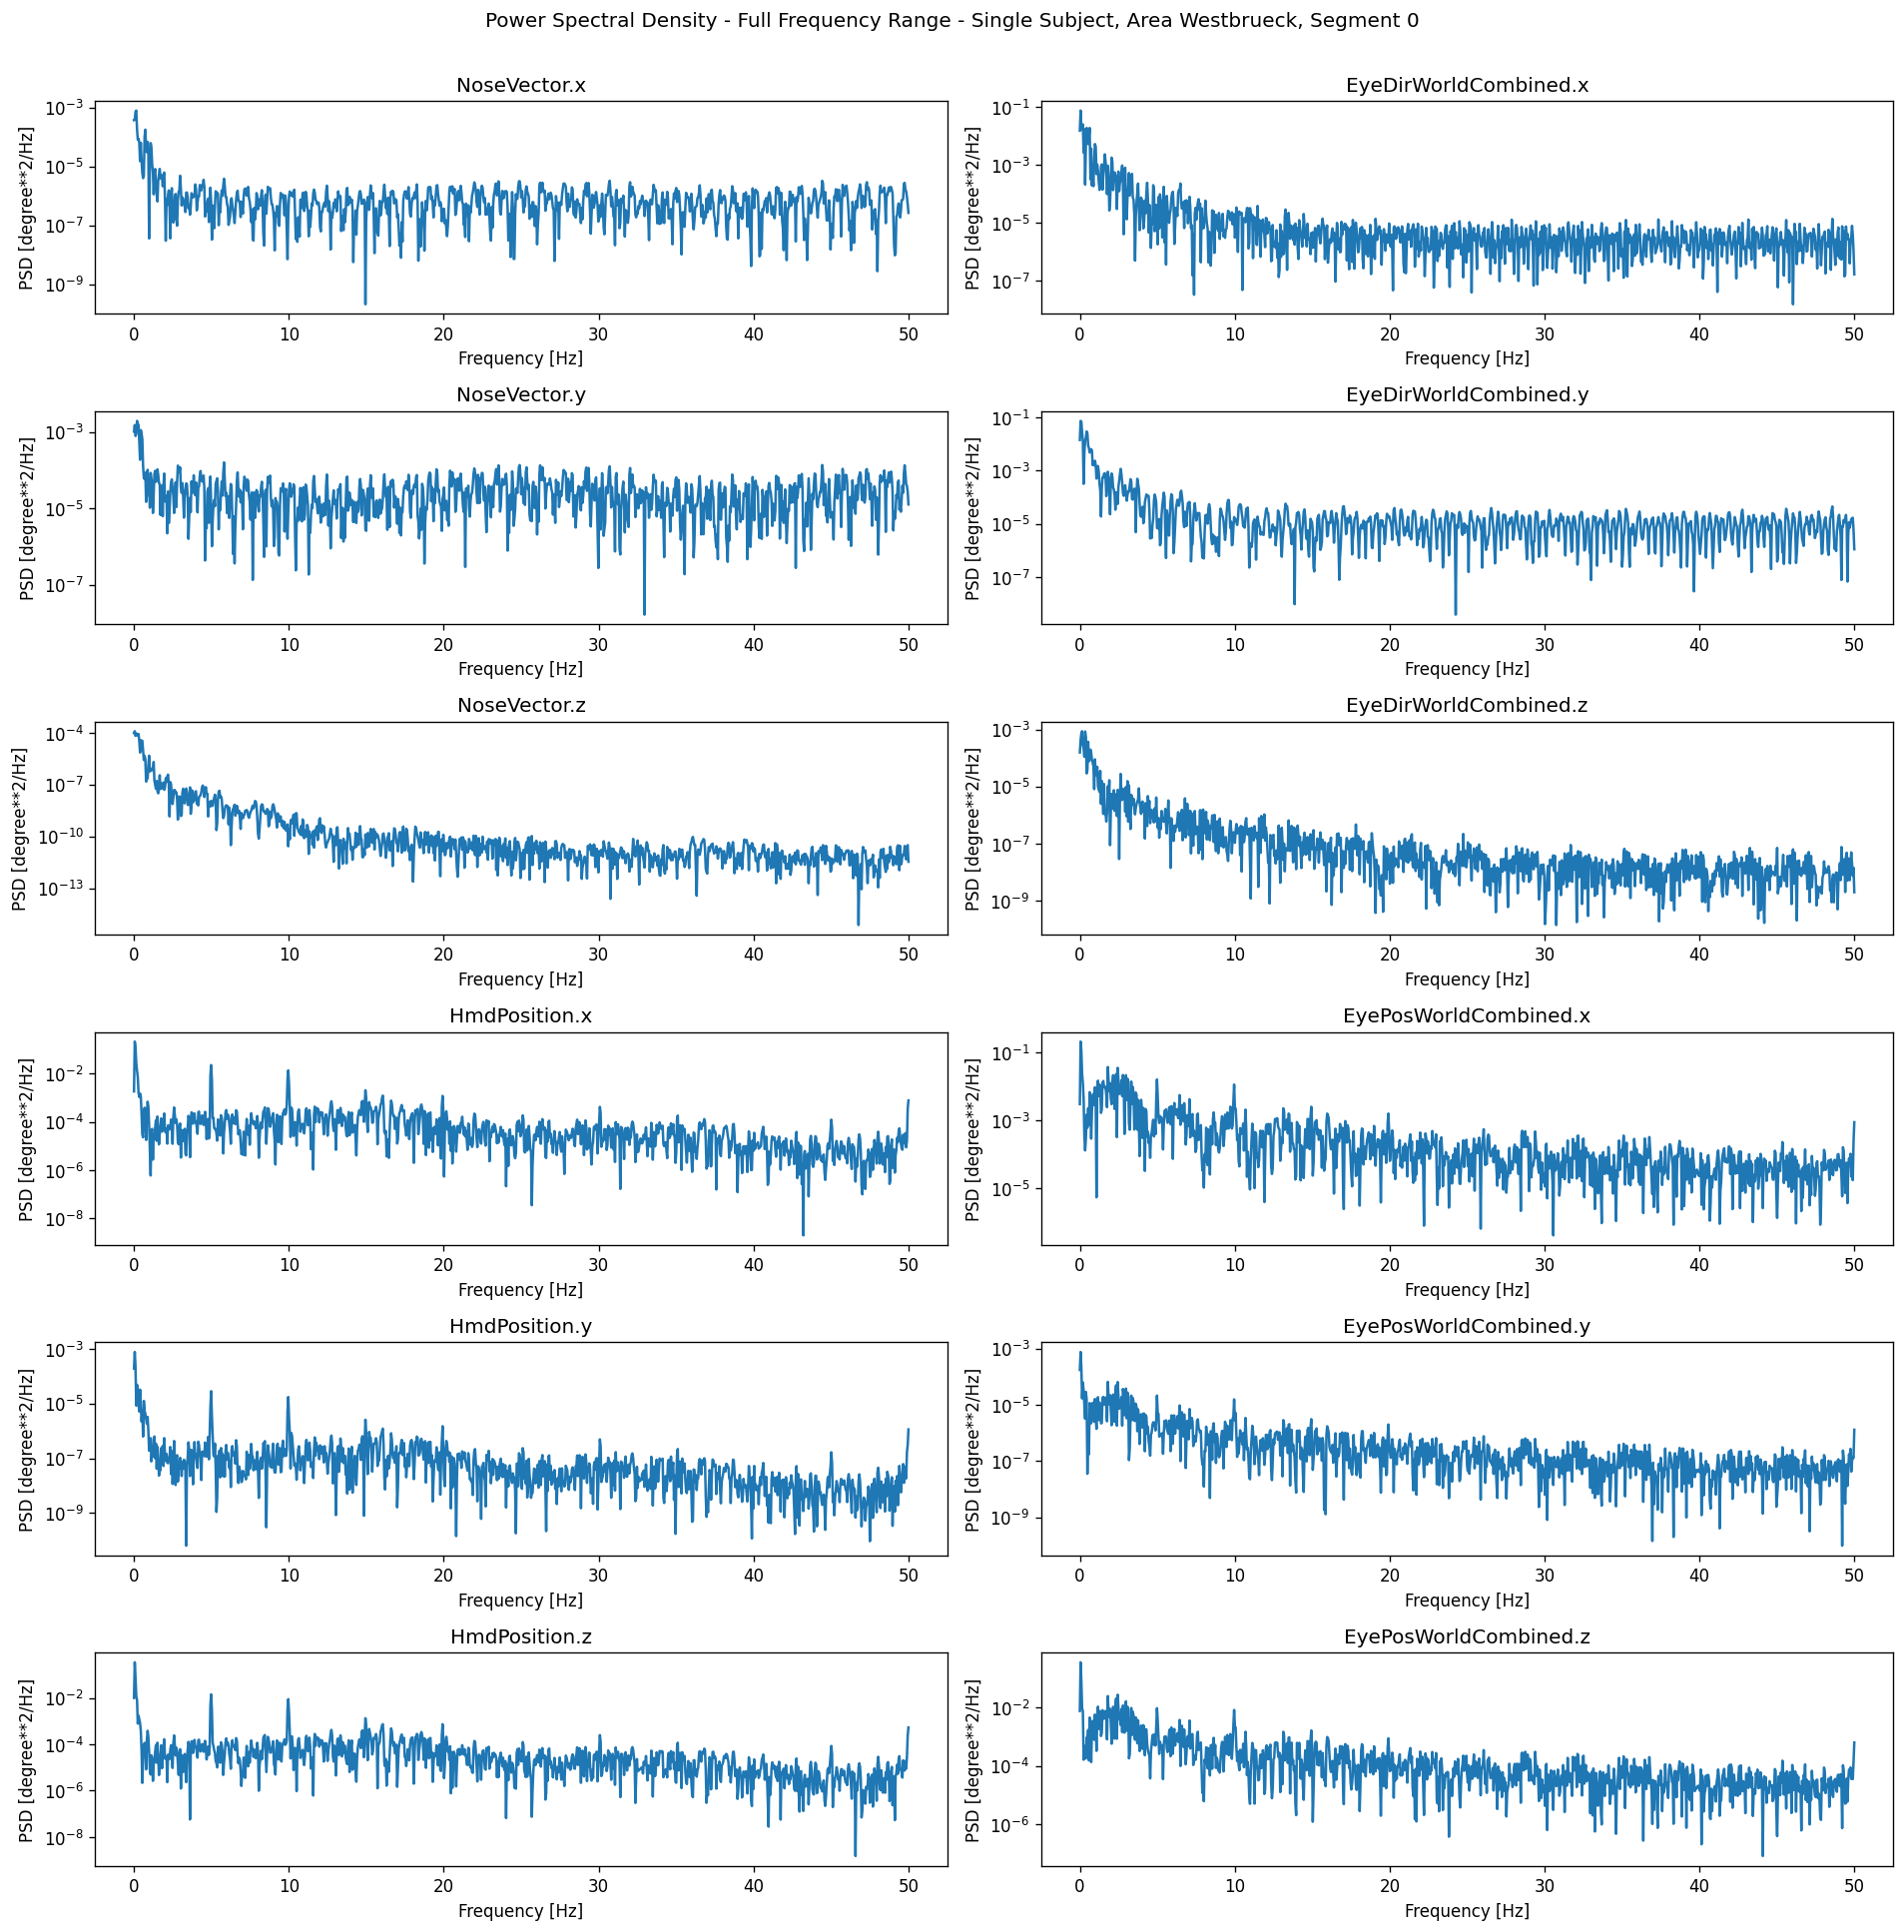

In [21]:
# Power Spectral Density - Full Frequency Range - Single Subject 

names_x = ["NoseVector.x","EyeDirWorldCombined.x","NoseVector.y","EyeDirWorldCombined.y","NoseVector.z","EyeDirWorldCombined.z", \
          "HmdPosition.x","EyePosWorldCombined.x","HmdPosition.y","EyePosWorldCombined.y","HmdPosition.z","EyePosWorldCombined.z"]
segment_data = one_participant_single_segment
plt_title = "Power Spectral Density - Full Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
fig_size = (16,16)
nrows = 6
ncols = 2
x_lim = -1
y_lim = -1
plot_power_spectral_densities(segment_data,names_x,plt_title,fig_size,nrows,ncols,x_lim,y_lim)


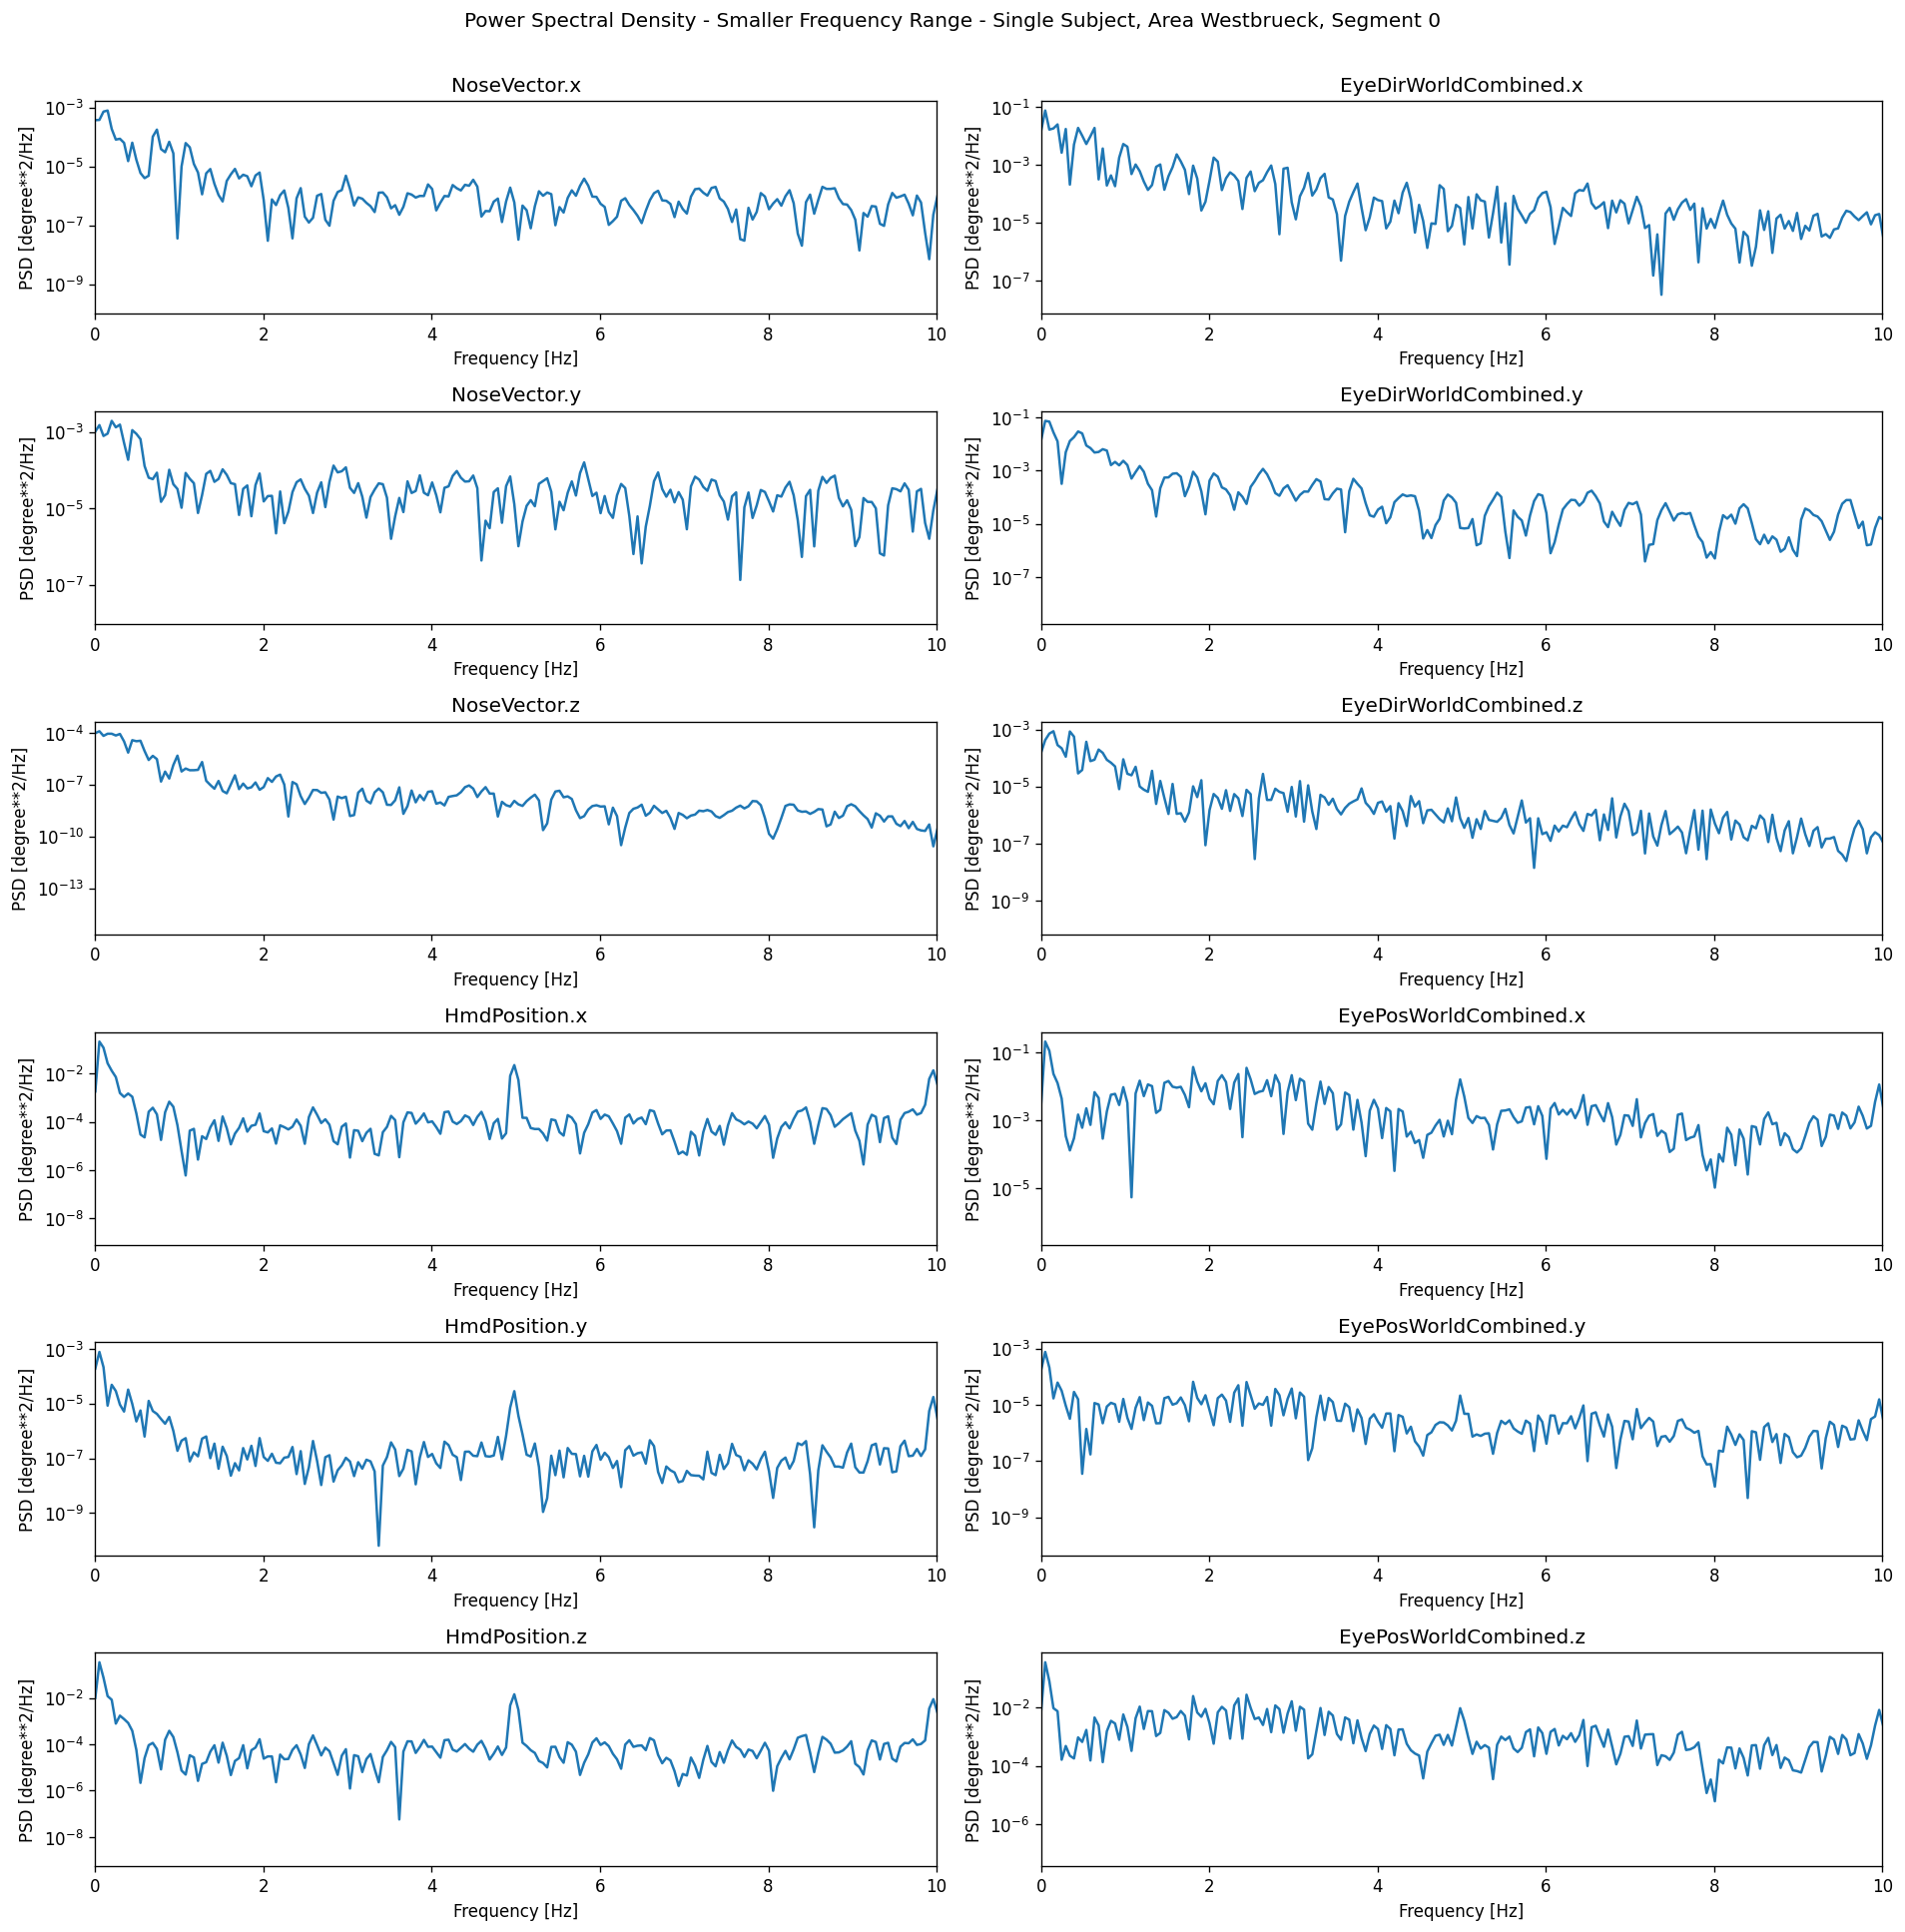

In [22]:
# Power Spectral Density - Smaller Frequency Range - Single Subject

names_x = ["NoseVector.x","EyeDirWorldCombined.x","NoseVector.y","EyeDirWorldCombined.y","NoseVector.z","EyeDirWorldCombined.z", \
          "HmdPosition.x","EyePosWorldCombined.x","HmdPosition.y","EyePosWorldCombined.y","HmdPosition.z","EyePosWorldCombined.z"]
segment_data = one_participant_single_segment
plt_title = "Power Spectral Density - Smaller Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
fig_size = (16,16)
nrows = 6
ncols = 2
x_lim = 10
y_lim = -1
plot_power_spectral_densities(segment_data,names_x,plt_title,fig_size,nrows,ncols,x_lim,y_lim)


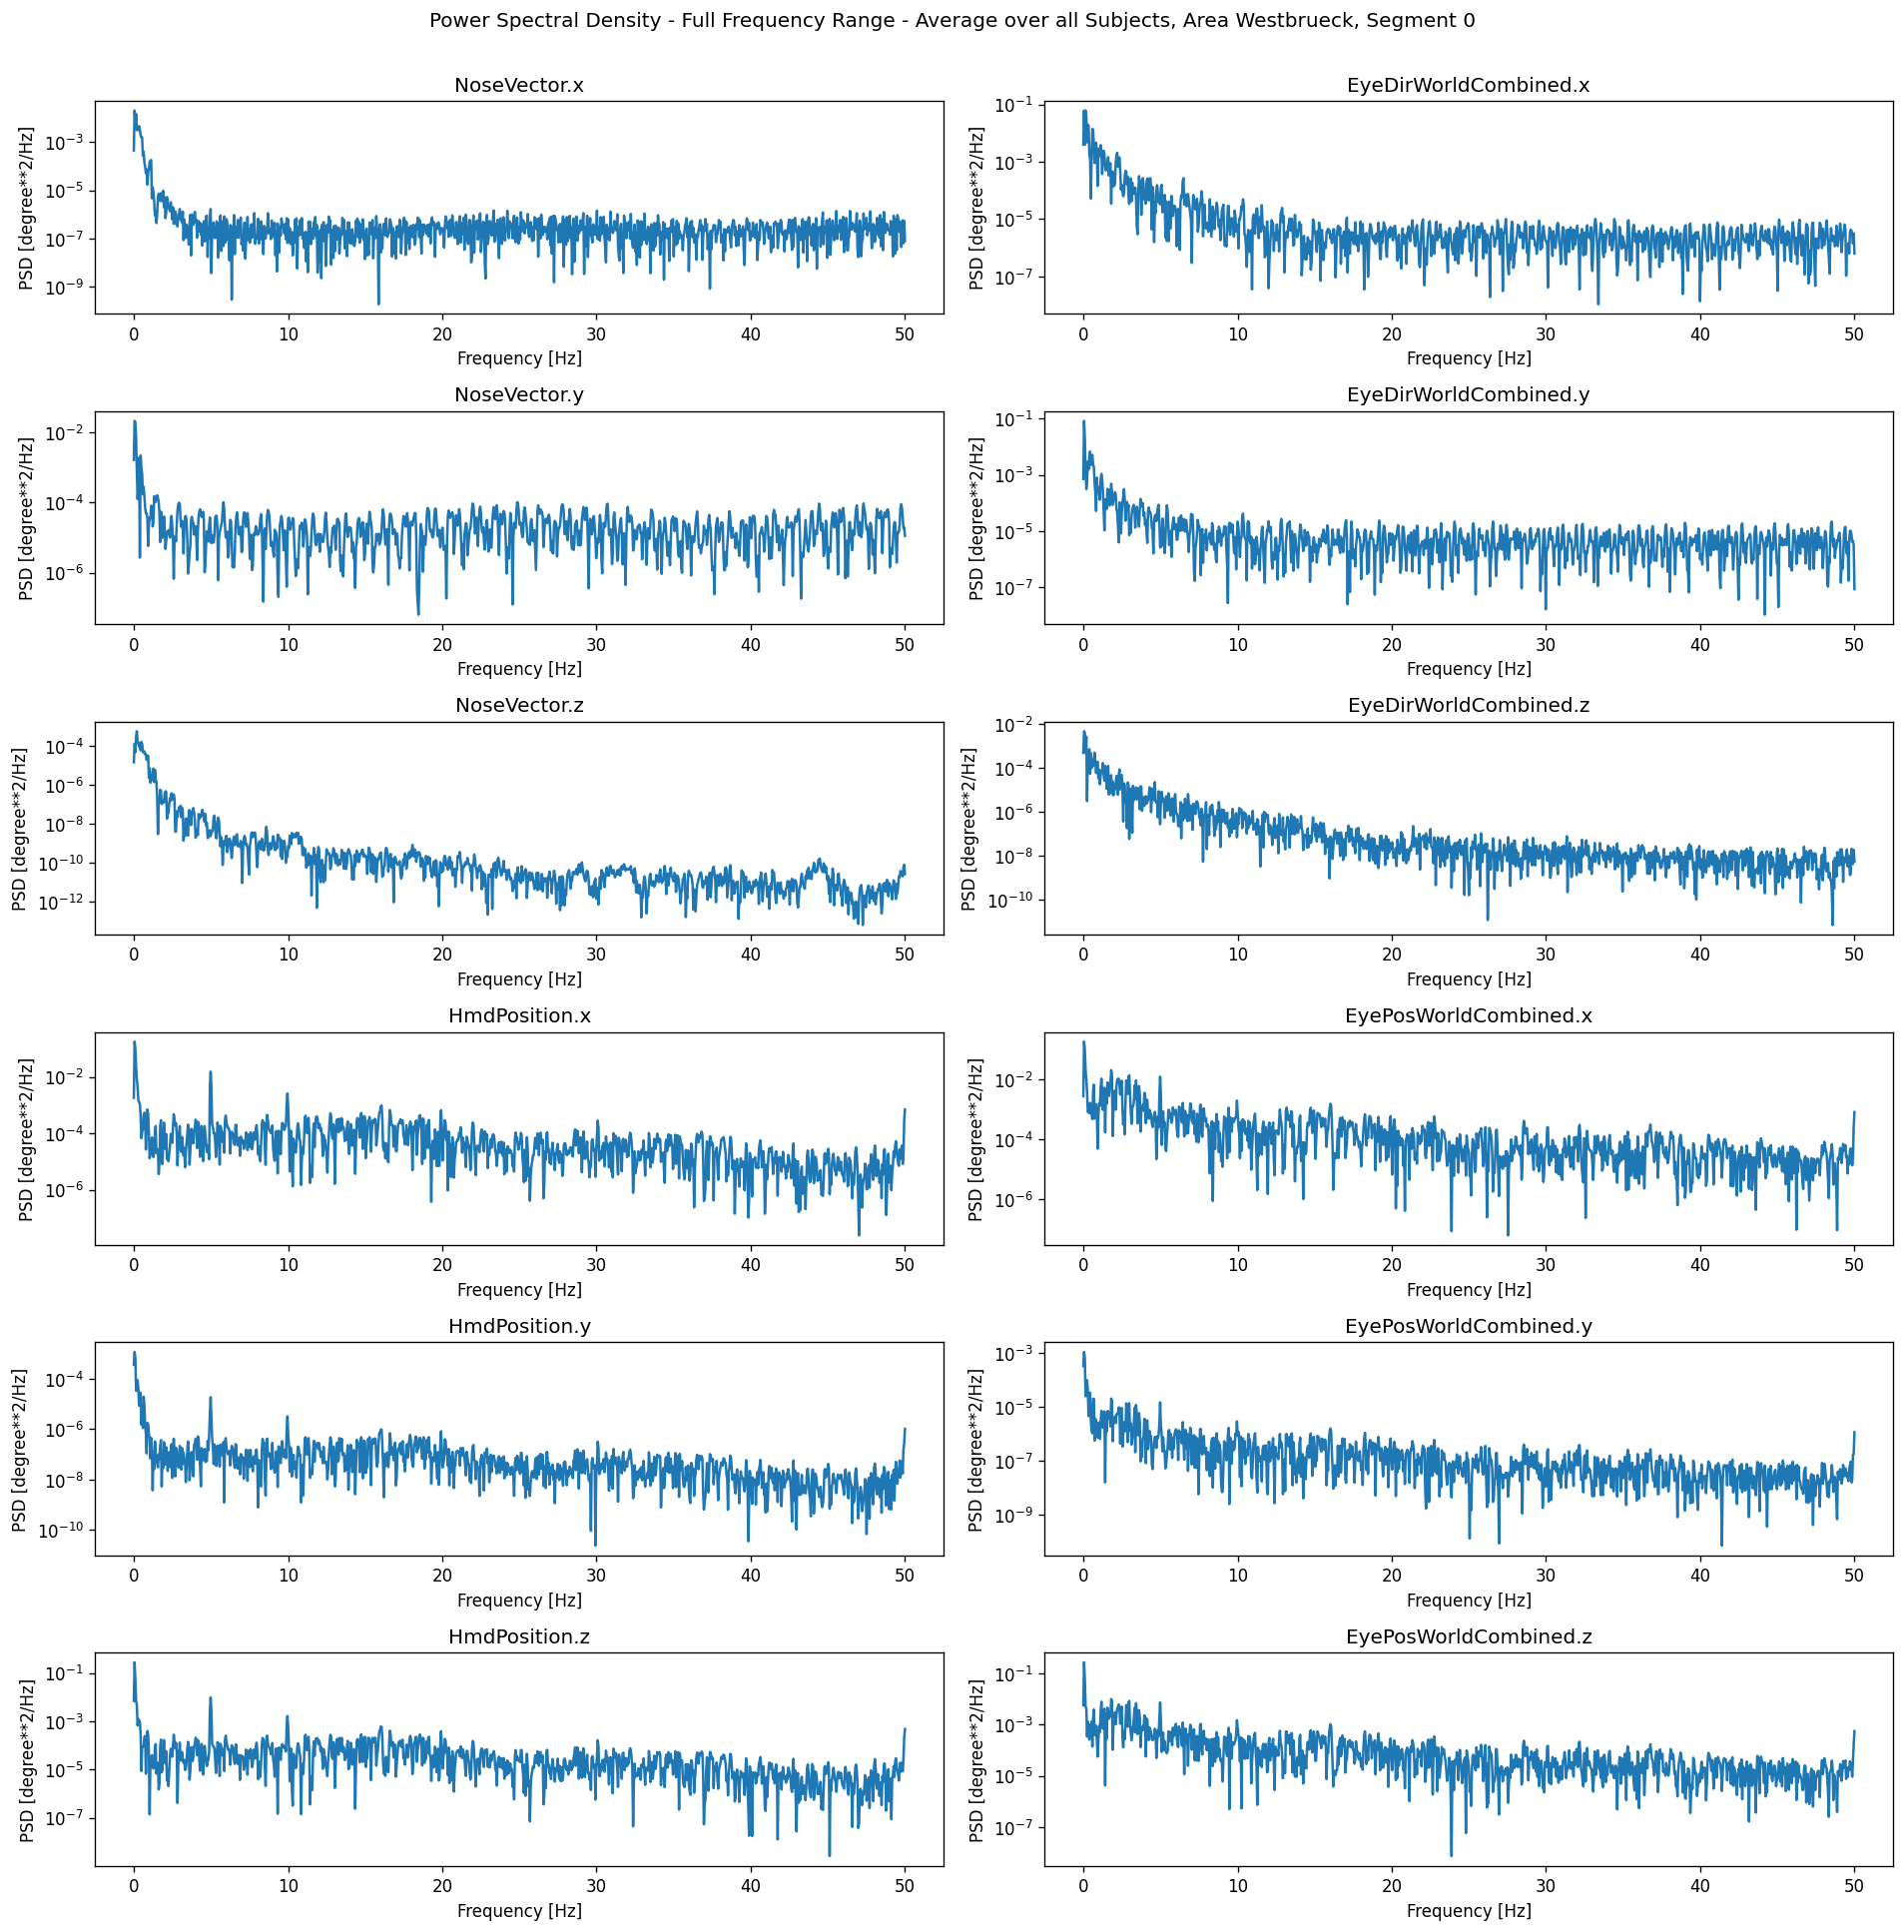

In [23]:
# Power Spectral Density - Full Frequency Range - Average over all Subjects

names_x = ["NoseVector.x","EyeDirWorldCombined.x","NoseVector.y","EyeDirWorldCombined.y","NoseVector.z","EyeDirWorldCombined.z", \
          "HmdPosition.x","EyePosWorldCombined.x","HmdPosition.y","EyePosWorldCombined.y","HmdPosition.z","EyePosWorldCombined.z"]
segment_data = average_over_all_participants_single_segment
plt_title = "Power Spectral Density - Full Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
fig_size = (16,16)
nrows = 6
ncols = 2
x_lim = -1
y_lim = -1
plot_power_spectral_densities(segment_data,names_x,plt_title,fig_size,nrows,ncols,x_lim,y_lim)



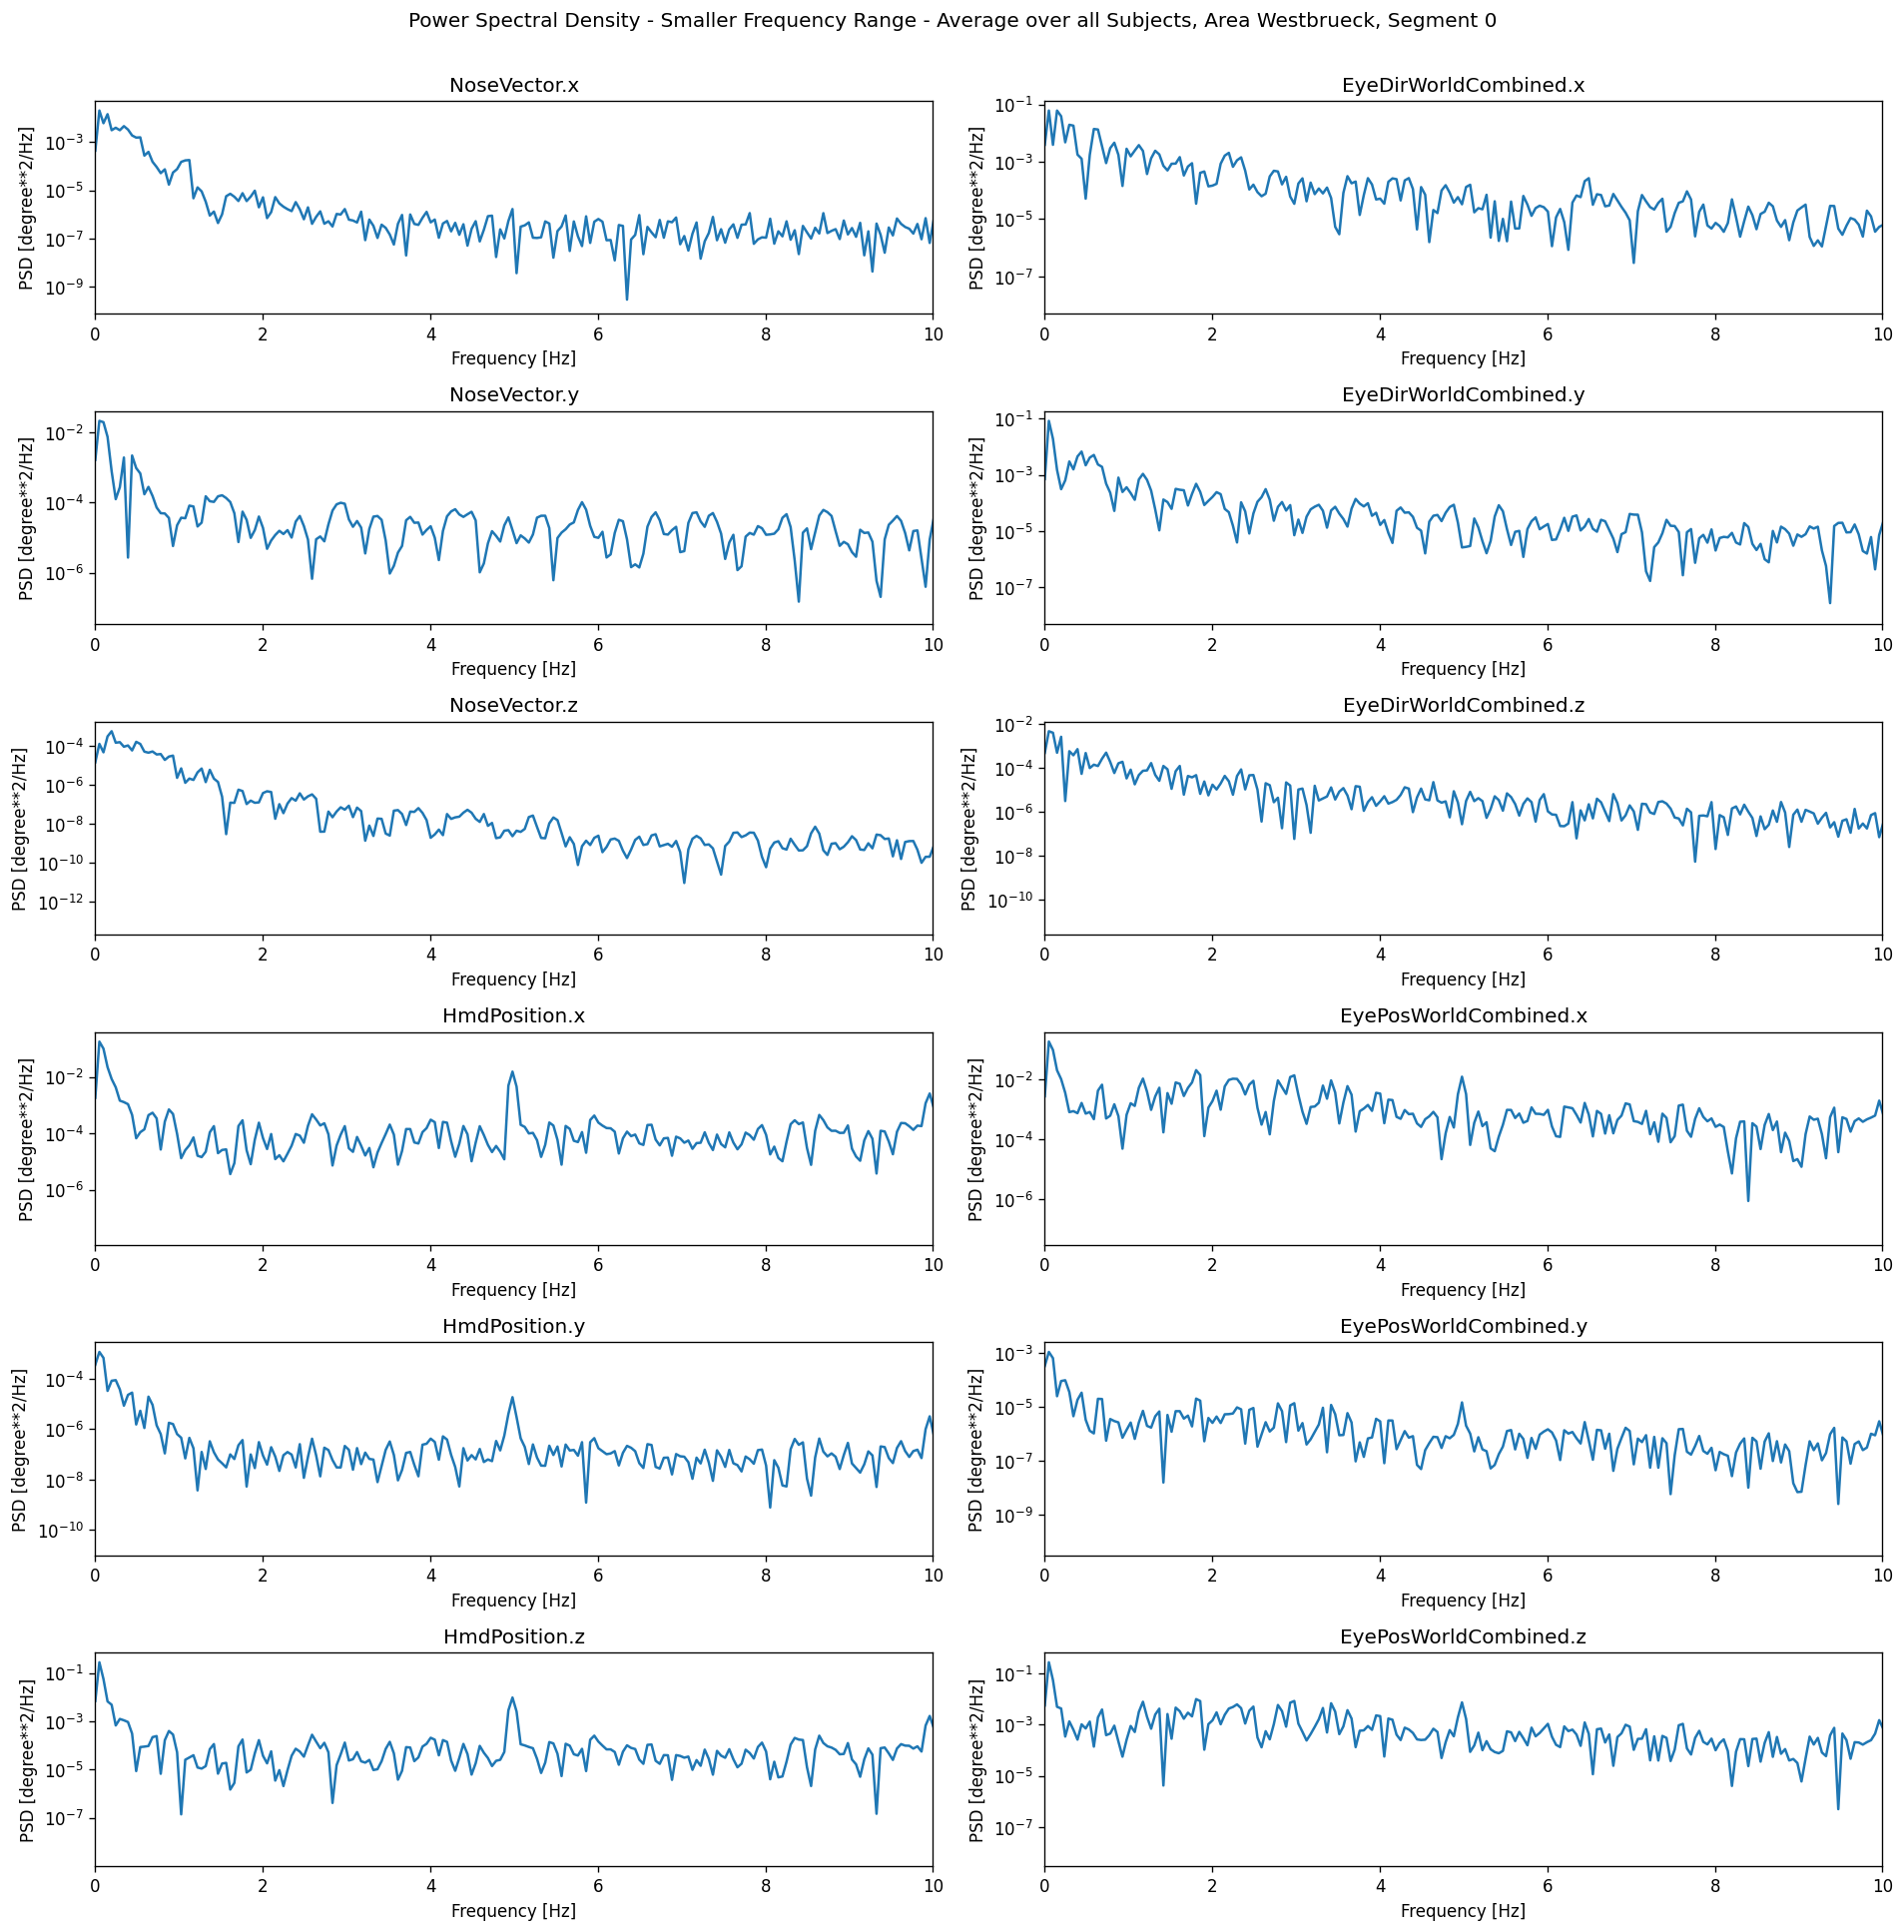

In [24]:
# Power Spectral Density - Smaller Frequency Range - Average over all Subjects

names_x = ["NoseVector.x","EyeDirWorldCombined.x","NoseVector.y","EyeDirWorldCombined.y","NoseVector.z","EyeDirWorldCombined.z", \
          "HmdPosition.x","EyePosWorldCombined.x","HmdPosition.y","EyePosWorldCombined.y","HmdPosition.z","EyePosWorldCombined.z"]
segment_data = average_over_all_participants_single_segment
plt_title = "Power Spectral Density - Smaller Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
fig_size = (16,16)
nrows = 6
ncols = 2
x_lim = 10
y_lim = -1
plot_power_spectral_densities(segment_data,names_x,plt_title,fig_size,nrows,ncols,x_lim,y_lim)



# Cross spectral density

In [25]:
def plot_cross_spectral_densities(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim=-1,y_lim=-1):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=fig_size, dpi=120)

    for idx, row in enumerate(ax.reshape(-1)):
            x = segment_data[names_x[idx]]
            y = segment_data[names_y[idx]]

            sample_freqs, csd = signal.csd(x,y,fs=(1/0.01),nperseg=nperseg)
            row.semilogy(sample_freqs, np.abs(csd))
            row.set_xlabel("Frequency [Hz]")
            row.set_ylabel("CSD [degree**2/Hz]")
            if x_lim > 0:
                row.set_xlim(0,x_lim)
            if y_lim > 0:
                row.set_ylim(0,y_lim)
            row.set_title(names_x[idx] + " - " + names_y[idx])

    fig.suptitle(plt_title, y=1.005)
    fig.tight_layout()
    plt.show()
    

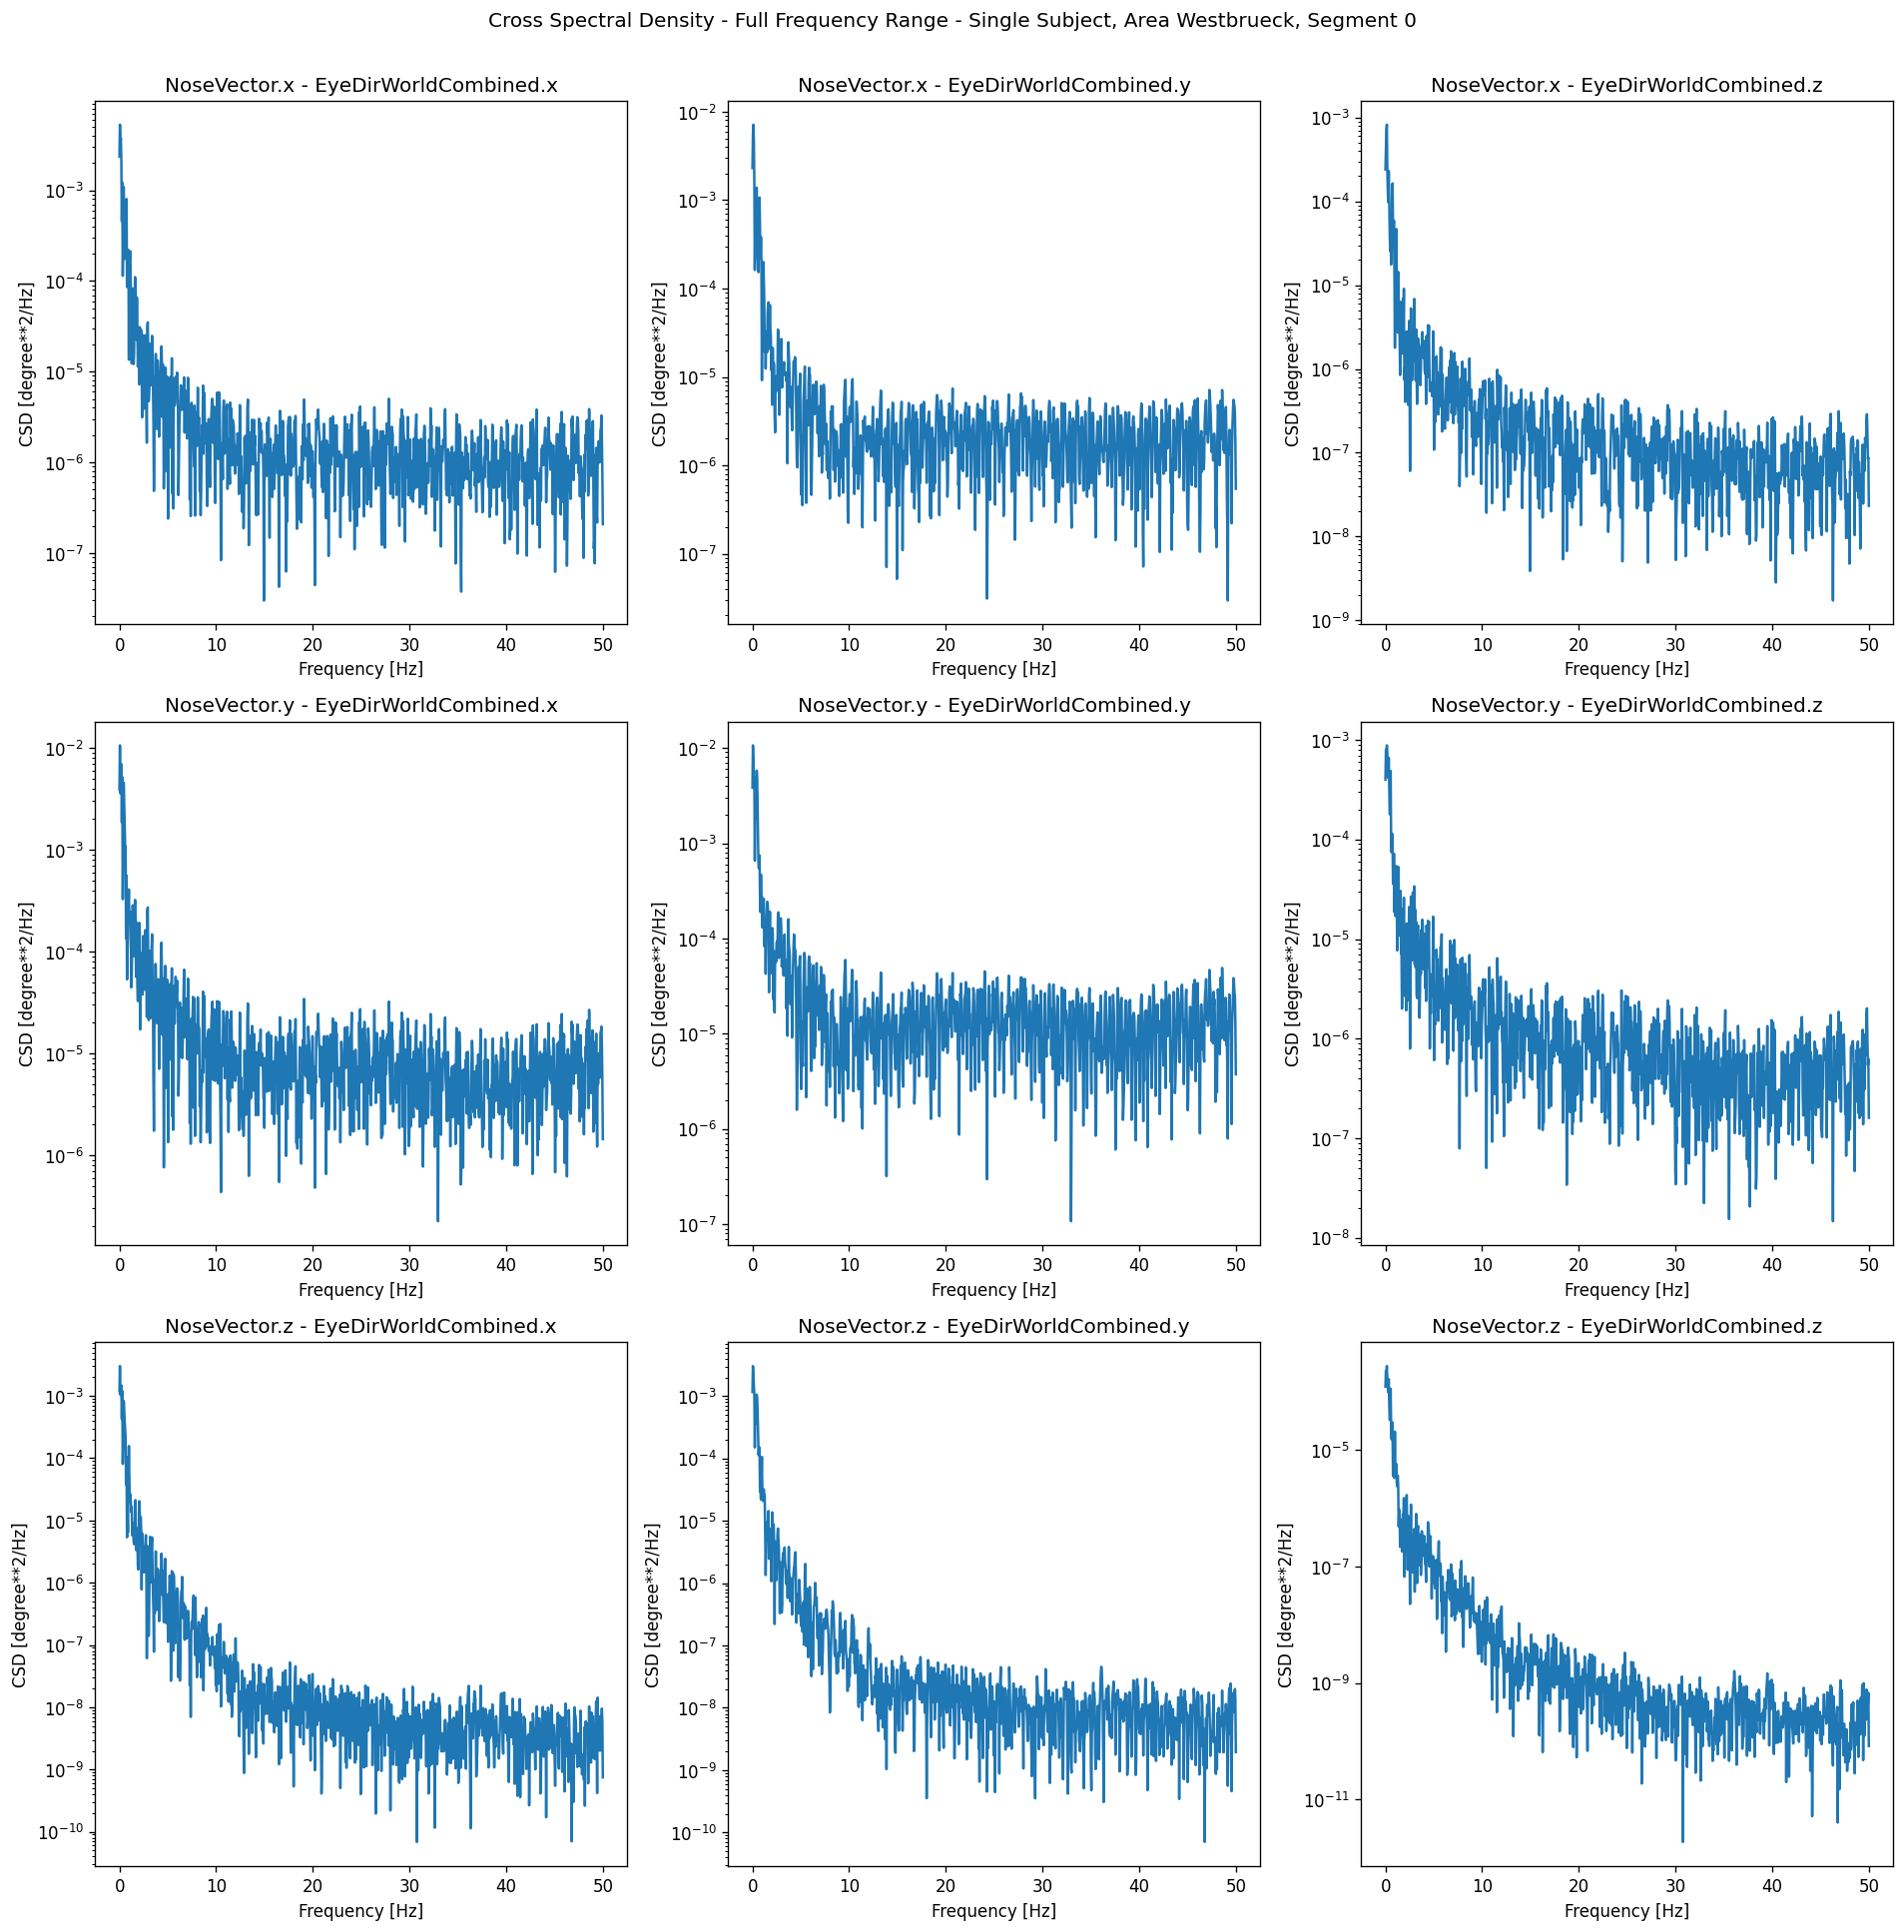

In [26]:
# Cross Spectral Density - Full Frequency Range - Single Subject     

segment_data = one_participant_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 2048 
plt_title = "Cross Spectral Density - Full Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 3
ncols = 3
x_lim = -1
y_lim = -1 

plot_cross_spectral_densities(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim=-1,y_lim=-1)


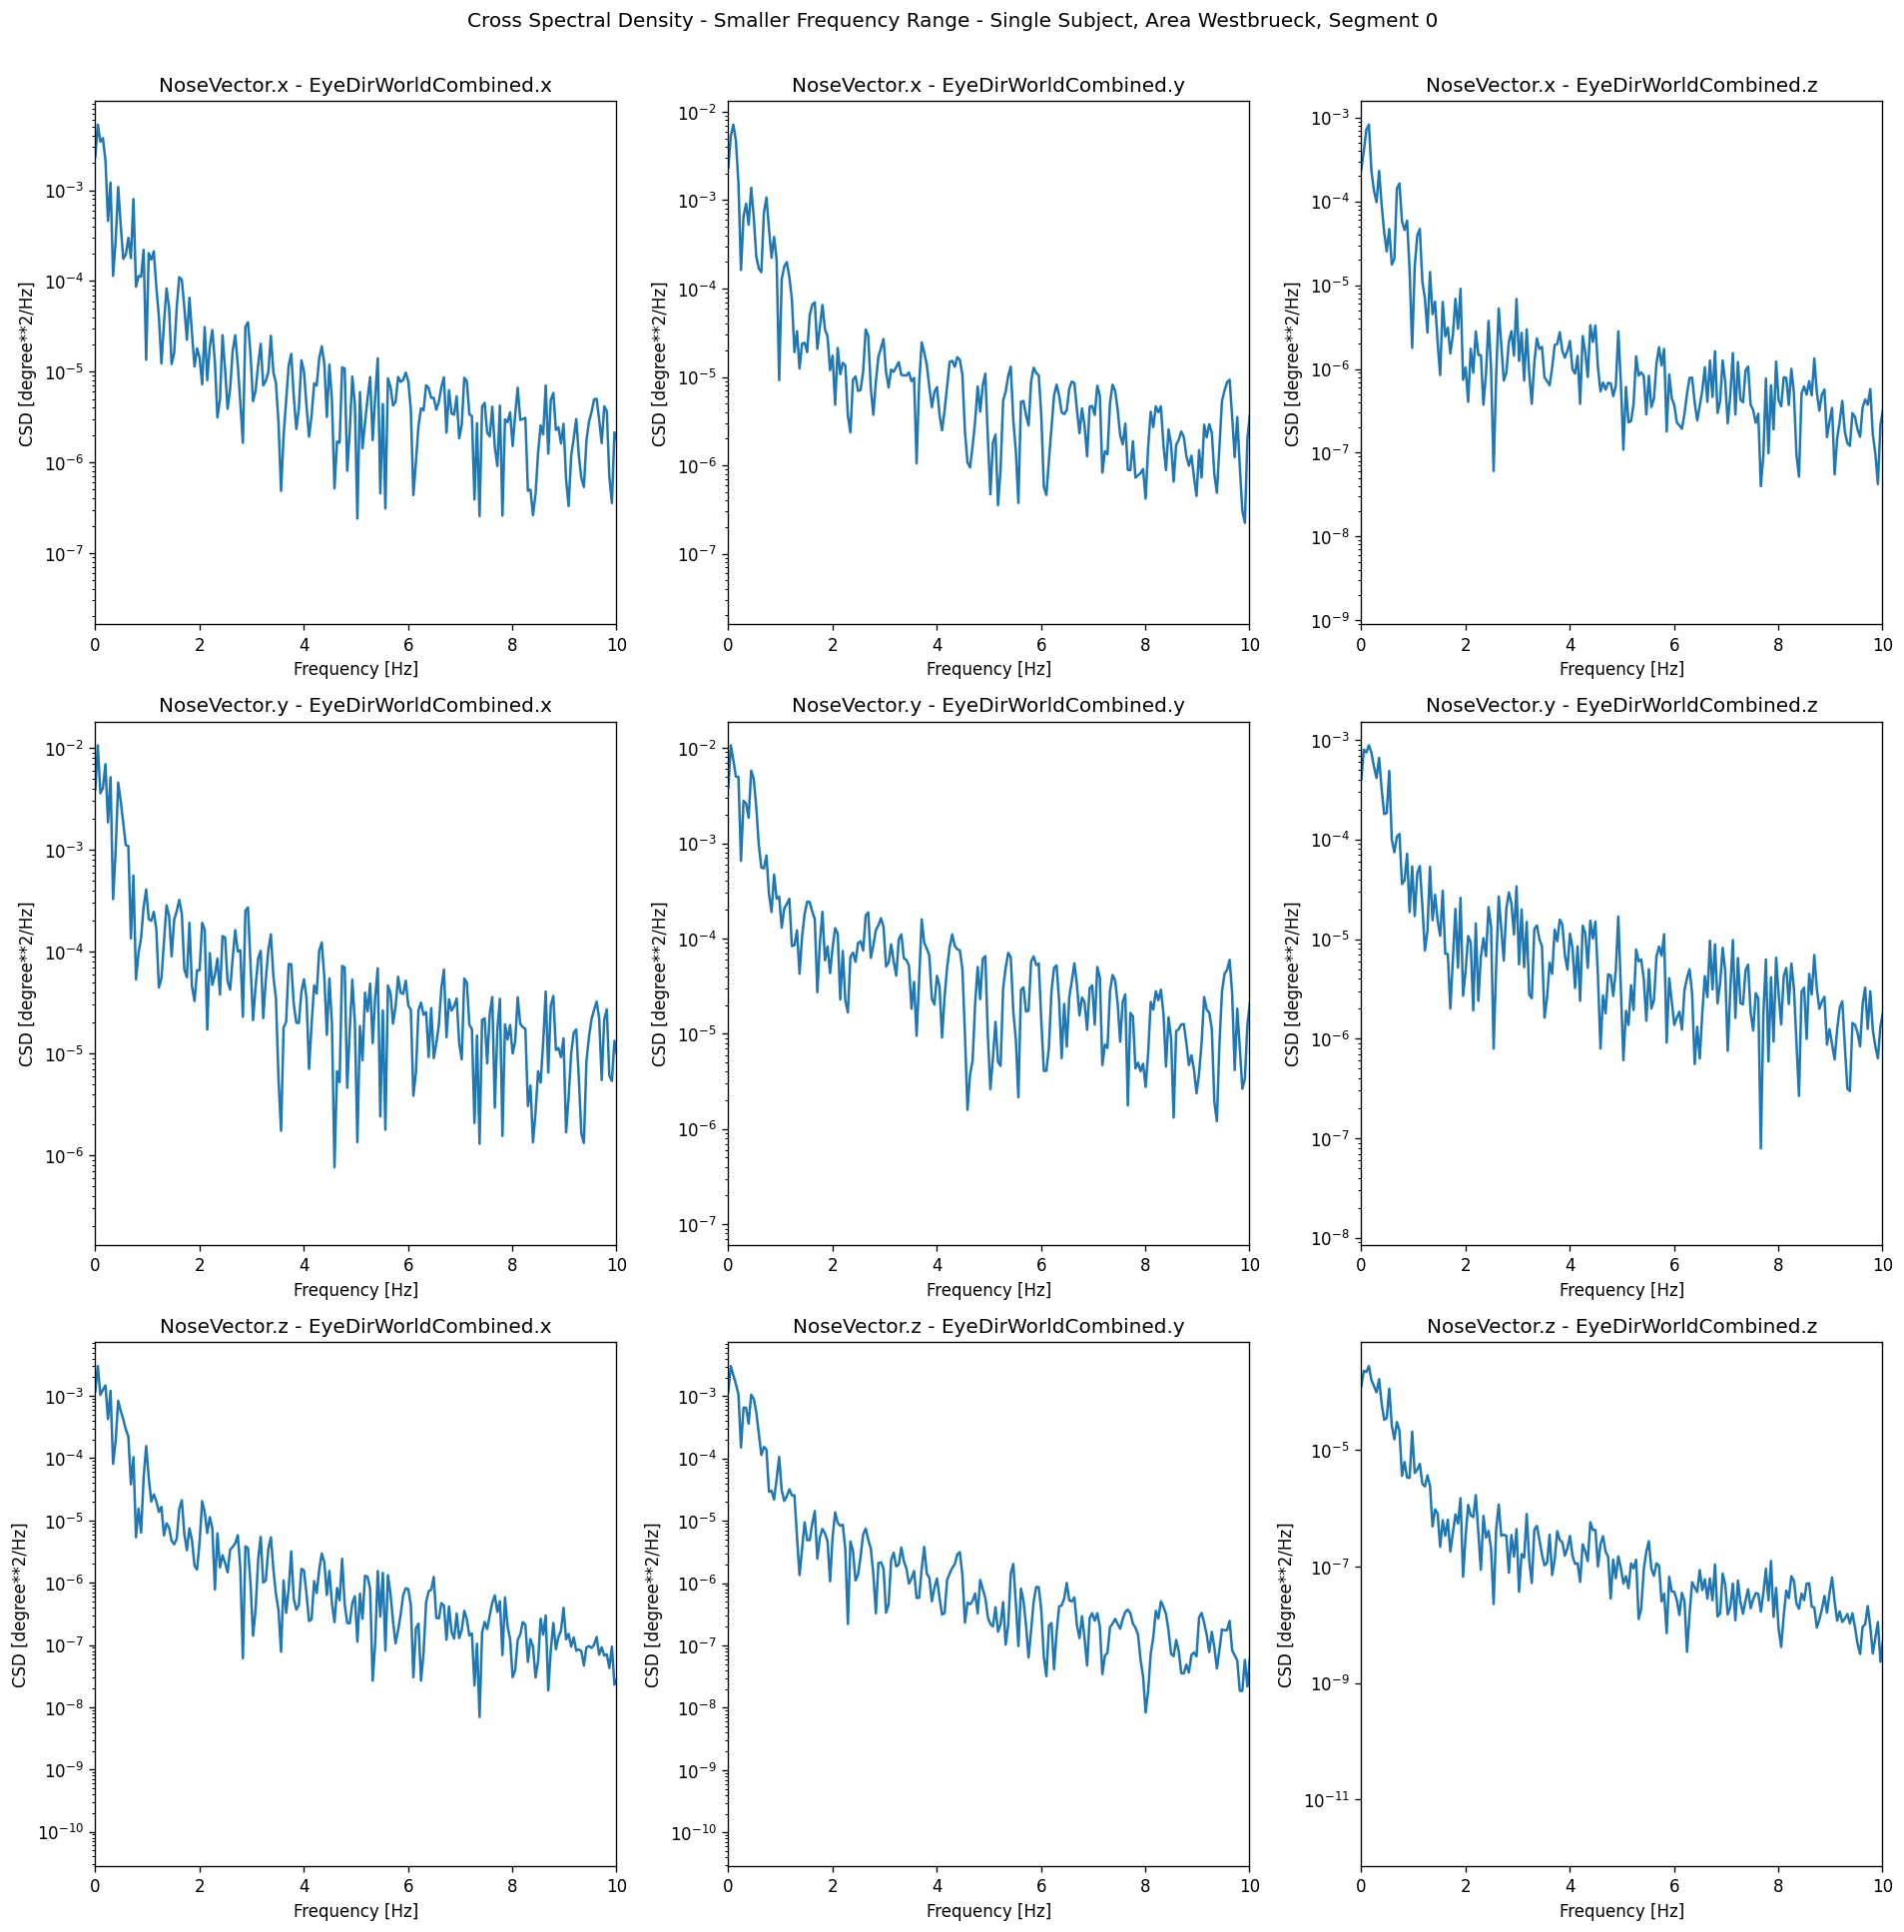

In [27]:
# Cross Spectral Density - Smaller Frequency Range - Single Subject

segment_data = one_participant_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 2048 
plt_title = "Cross Spectral Density - Smaller Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 3
ncols = 3
x_lim = 10
y_lim = -1 

plot_cross_spectral_densities(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)



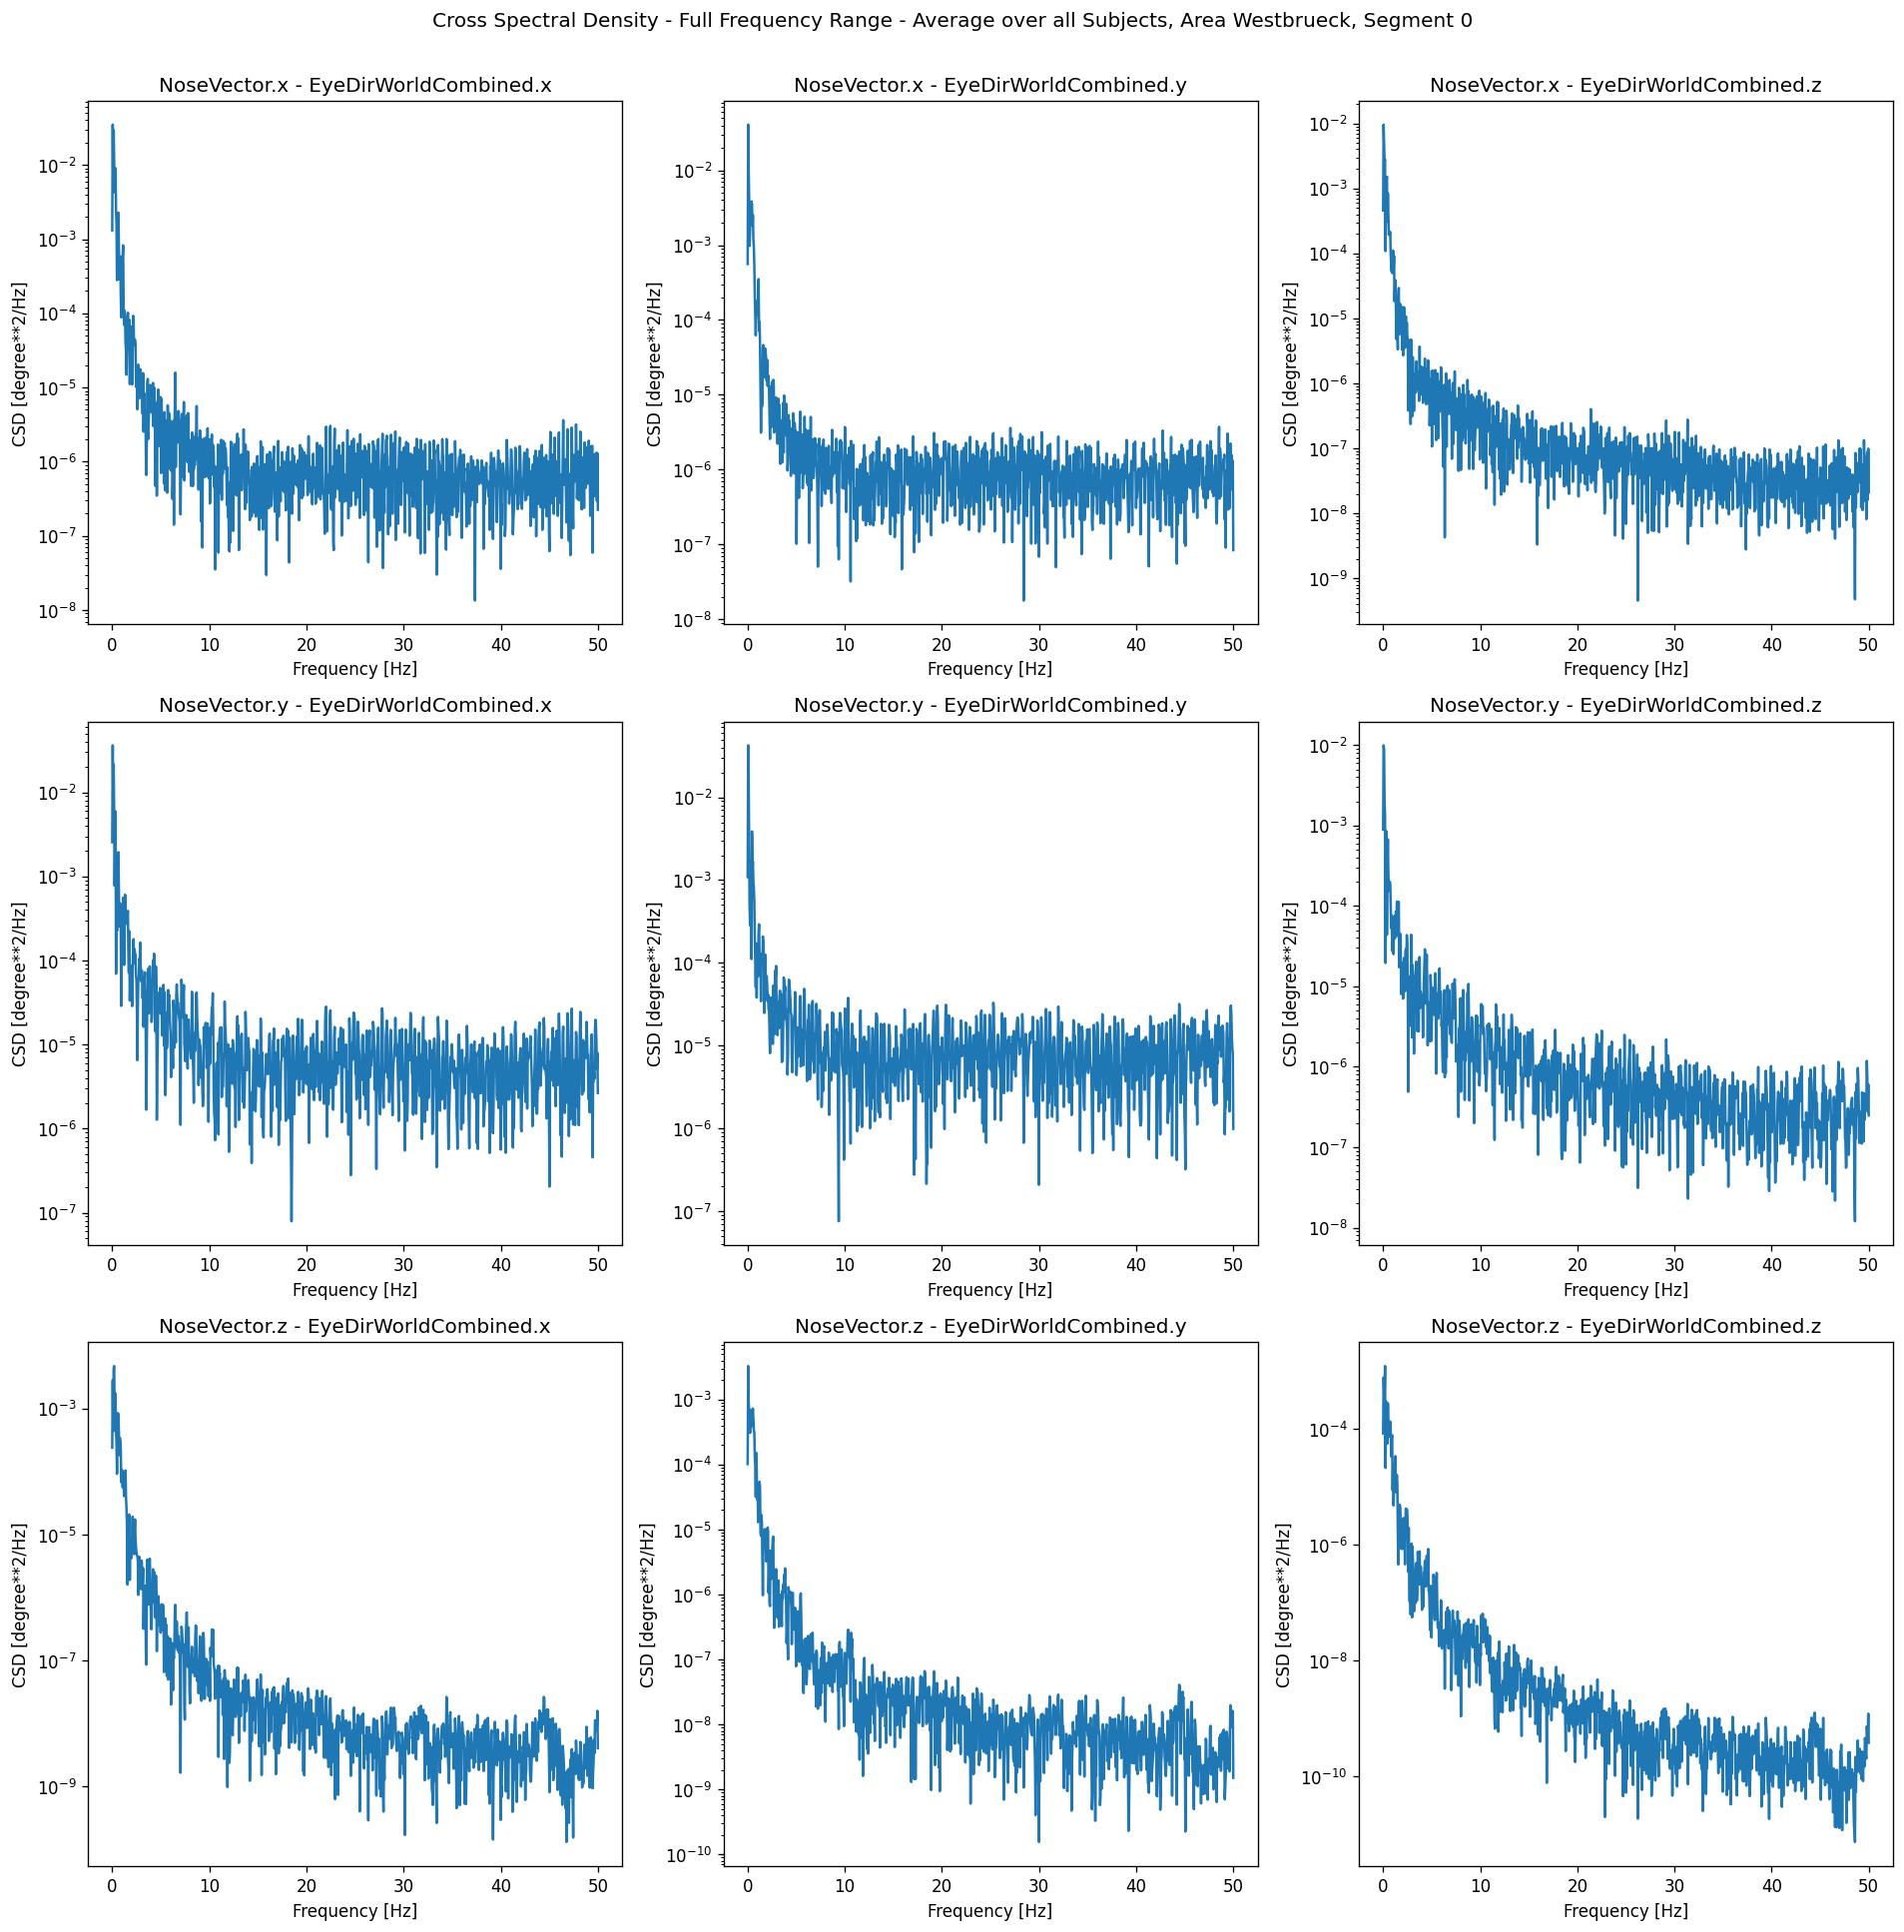

In [28]:
# Cross Spectral Density - Full Frequency Range - Average over all Subject

segment_data = average_over_all_participants_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 2048 
plt_title = "Cross Spectral Density - Full Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 3
ncols = 3
x_lim = -1
y_lim = -1 

plot_cross_spectral_densities(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)



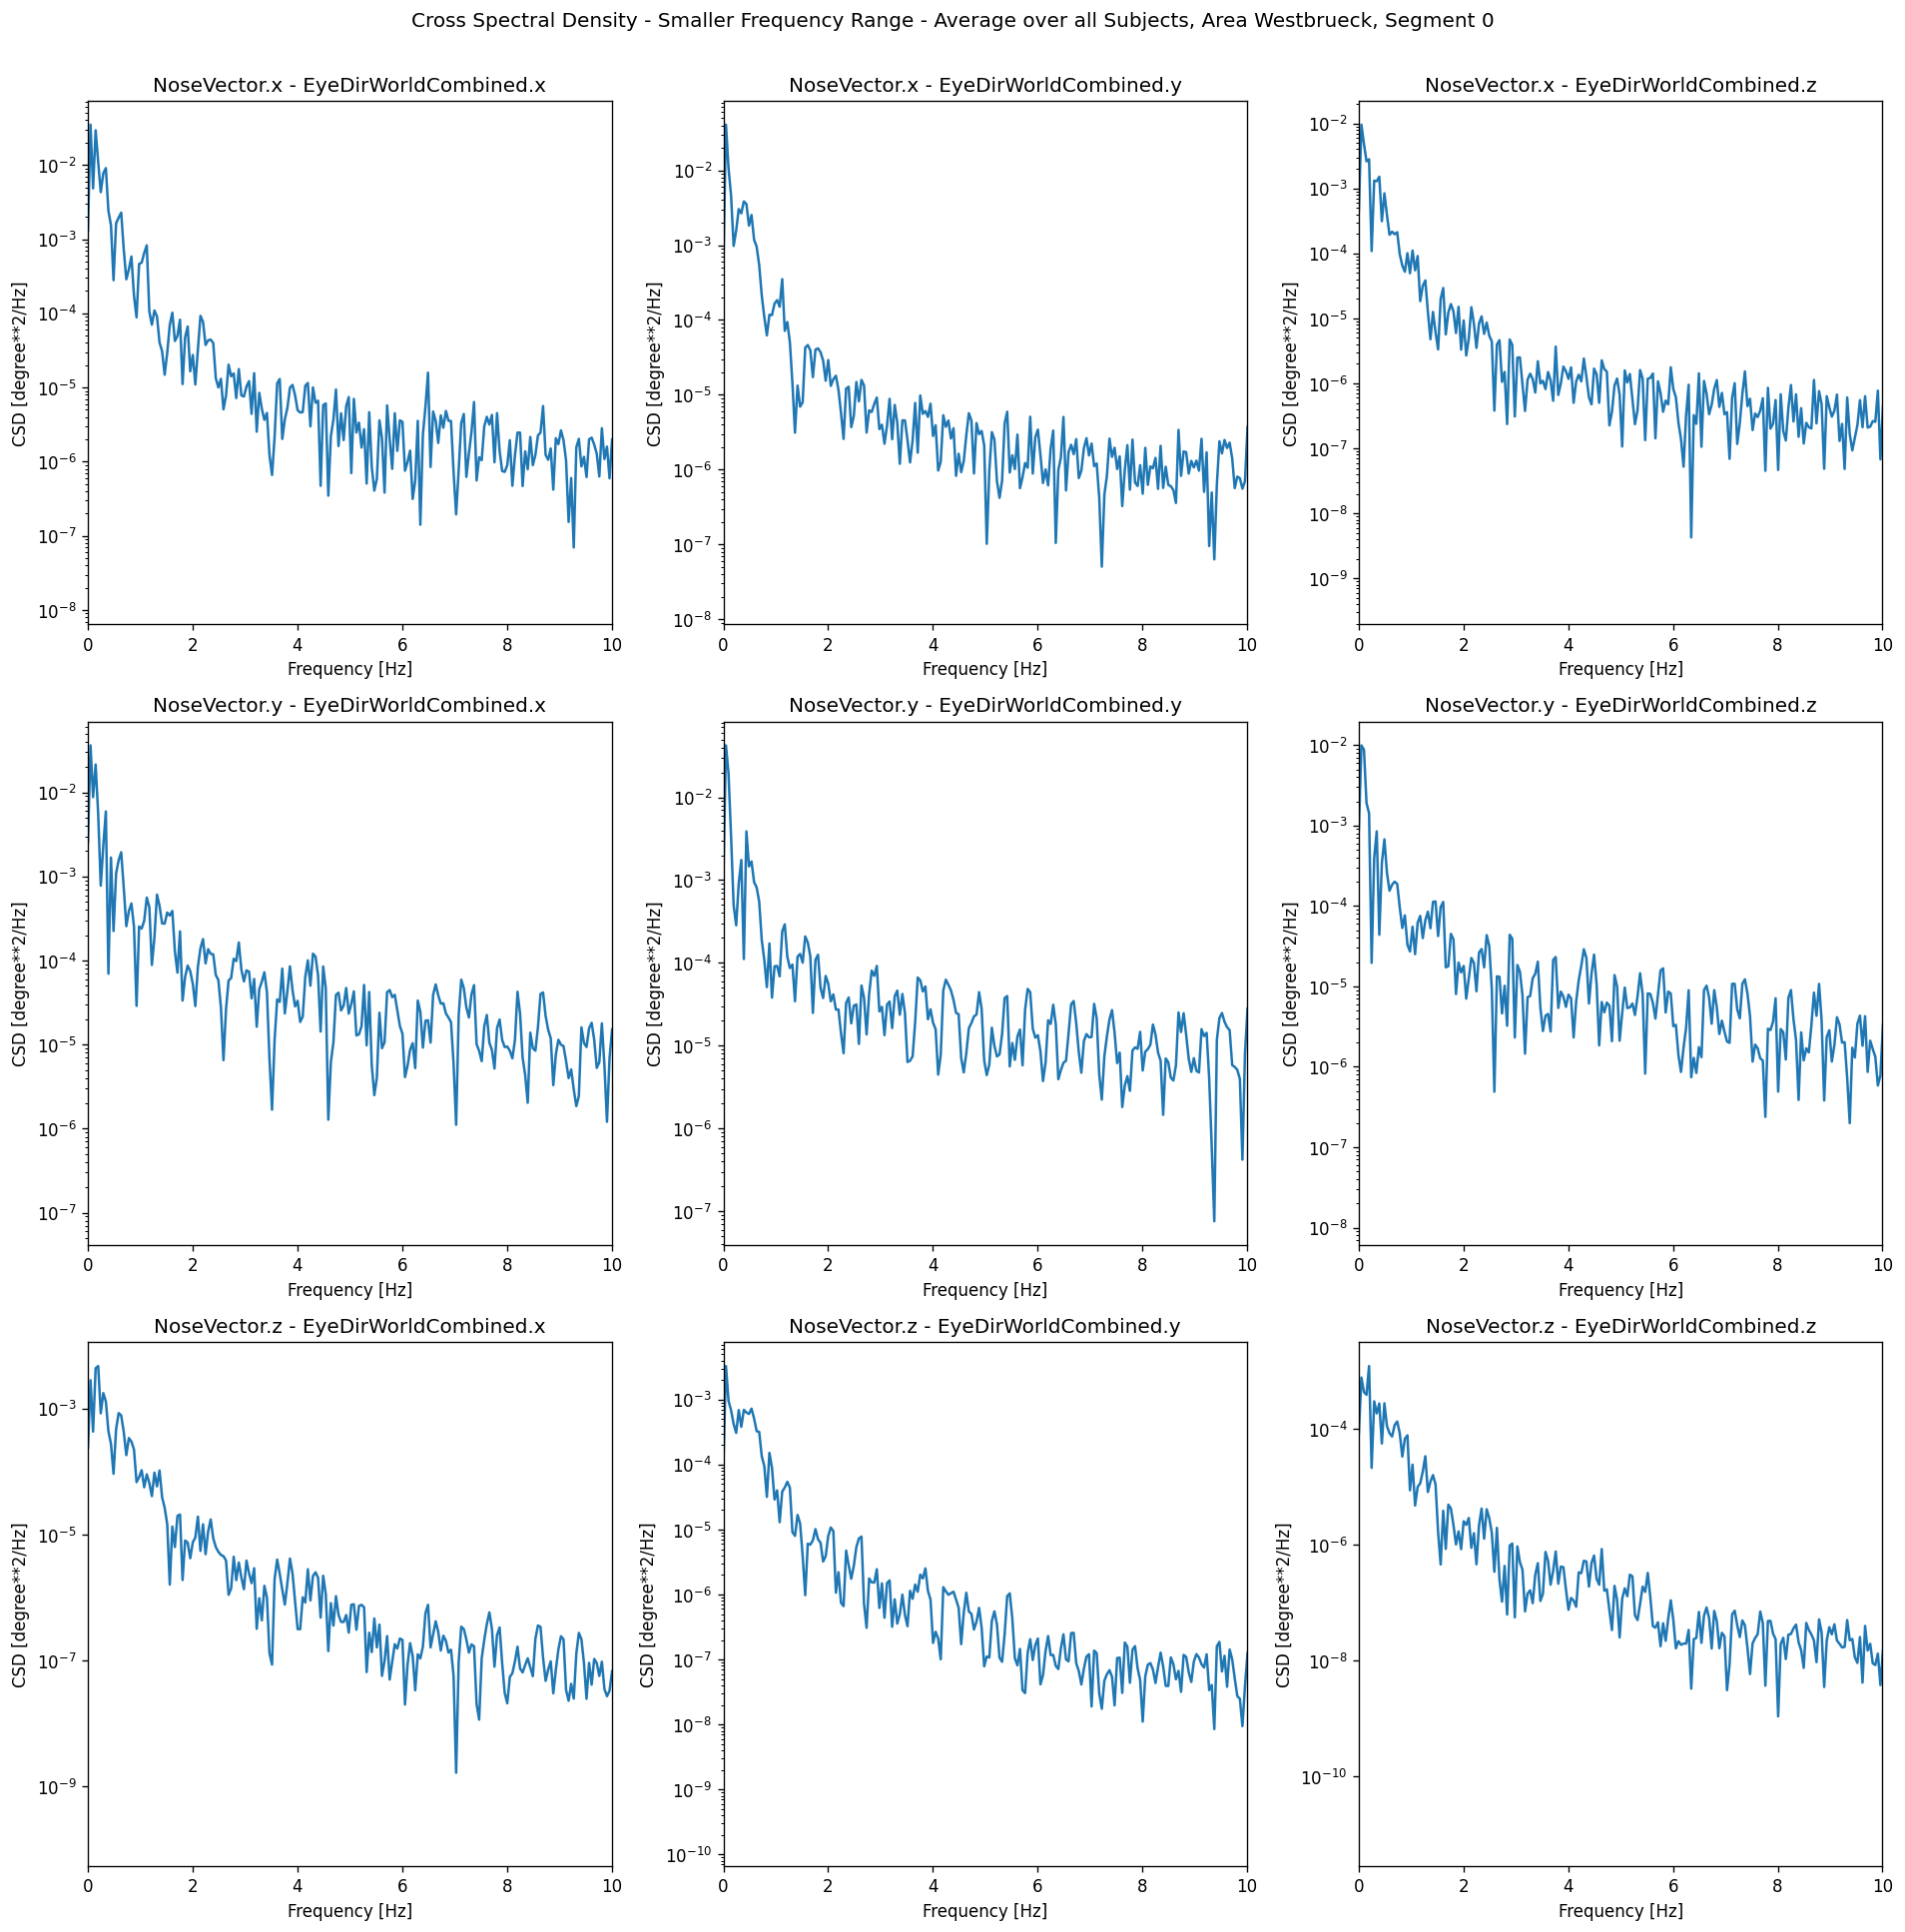

In [29]:
# Cross Spectral Density - Smaller Frequency Range - Average over all Subjects

segment_data = average_over_all_participants_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 2048 
plt_title = "Cross Spectral Density - Smaller Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 3
ncols = 3
x_lim = 10
y_lim = -1 

plot_cross_spectral_densities(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)




In [30]:
def plot_coherence(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim=-1,y_lim=-1):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=fig_size, dpi=120)

    for idx, row in enumerate(ax.reshape(-1)):
            x = segment_data[names_x[idx]]
            y = segment_data[names_y[idx]]

            sample_freqs, cxy = signal.coherence(x,y,fs=(1/0.01),nperseg=nperseg) 
            row.plot(cxy) # plot actual signal 
            #row.semilogy(sample_freqs, cxy) # plot in decibels 
            row.set_xlabel("Frequency [Hz]")
            row.set_ylabel("Coherence")
            if x_lim > 0:
                row.set_xlim(0,x_lim)
            if y_lim > 0:
                row.set_ylim(0,y_lim)
            row.set_title(names_x[idx] + " - " + names_y[idx])

    fig.suptitle(plt_title, y=1.005)
    fig.tight_layout()
    plt.show()
    

# Coherence

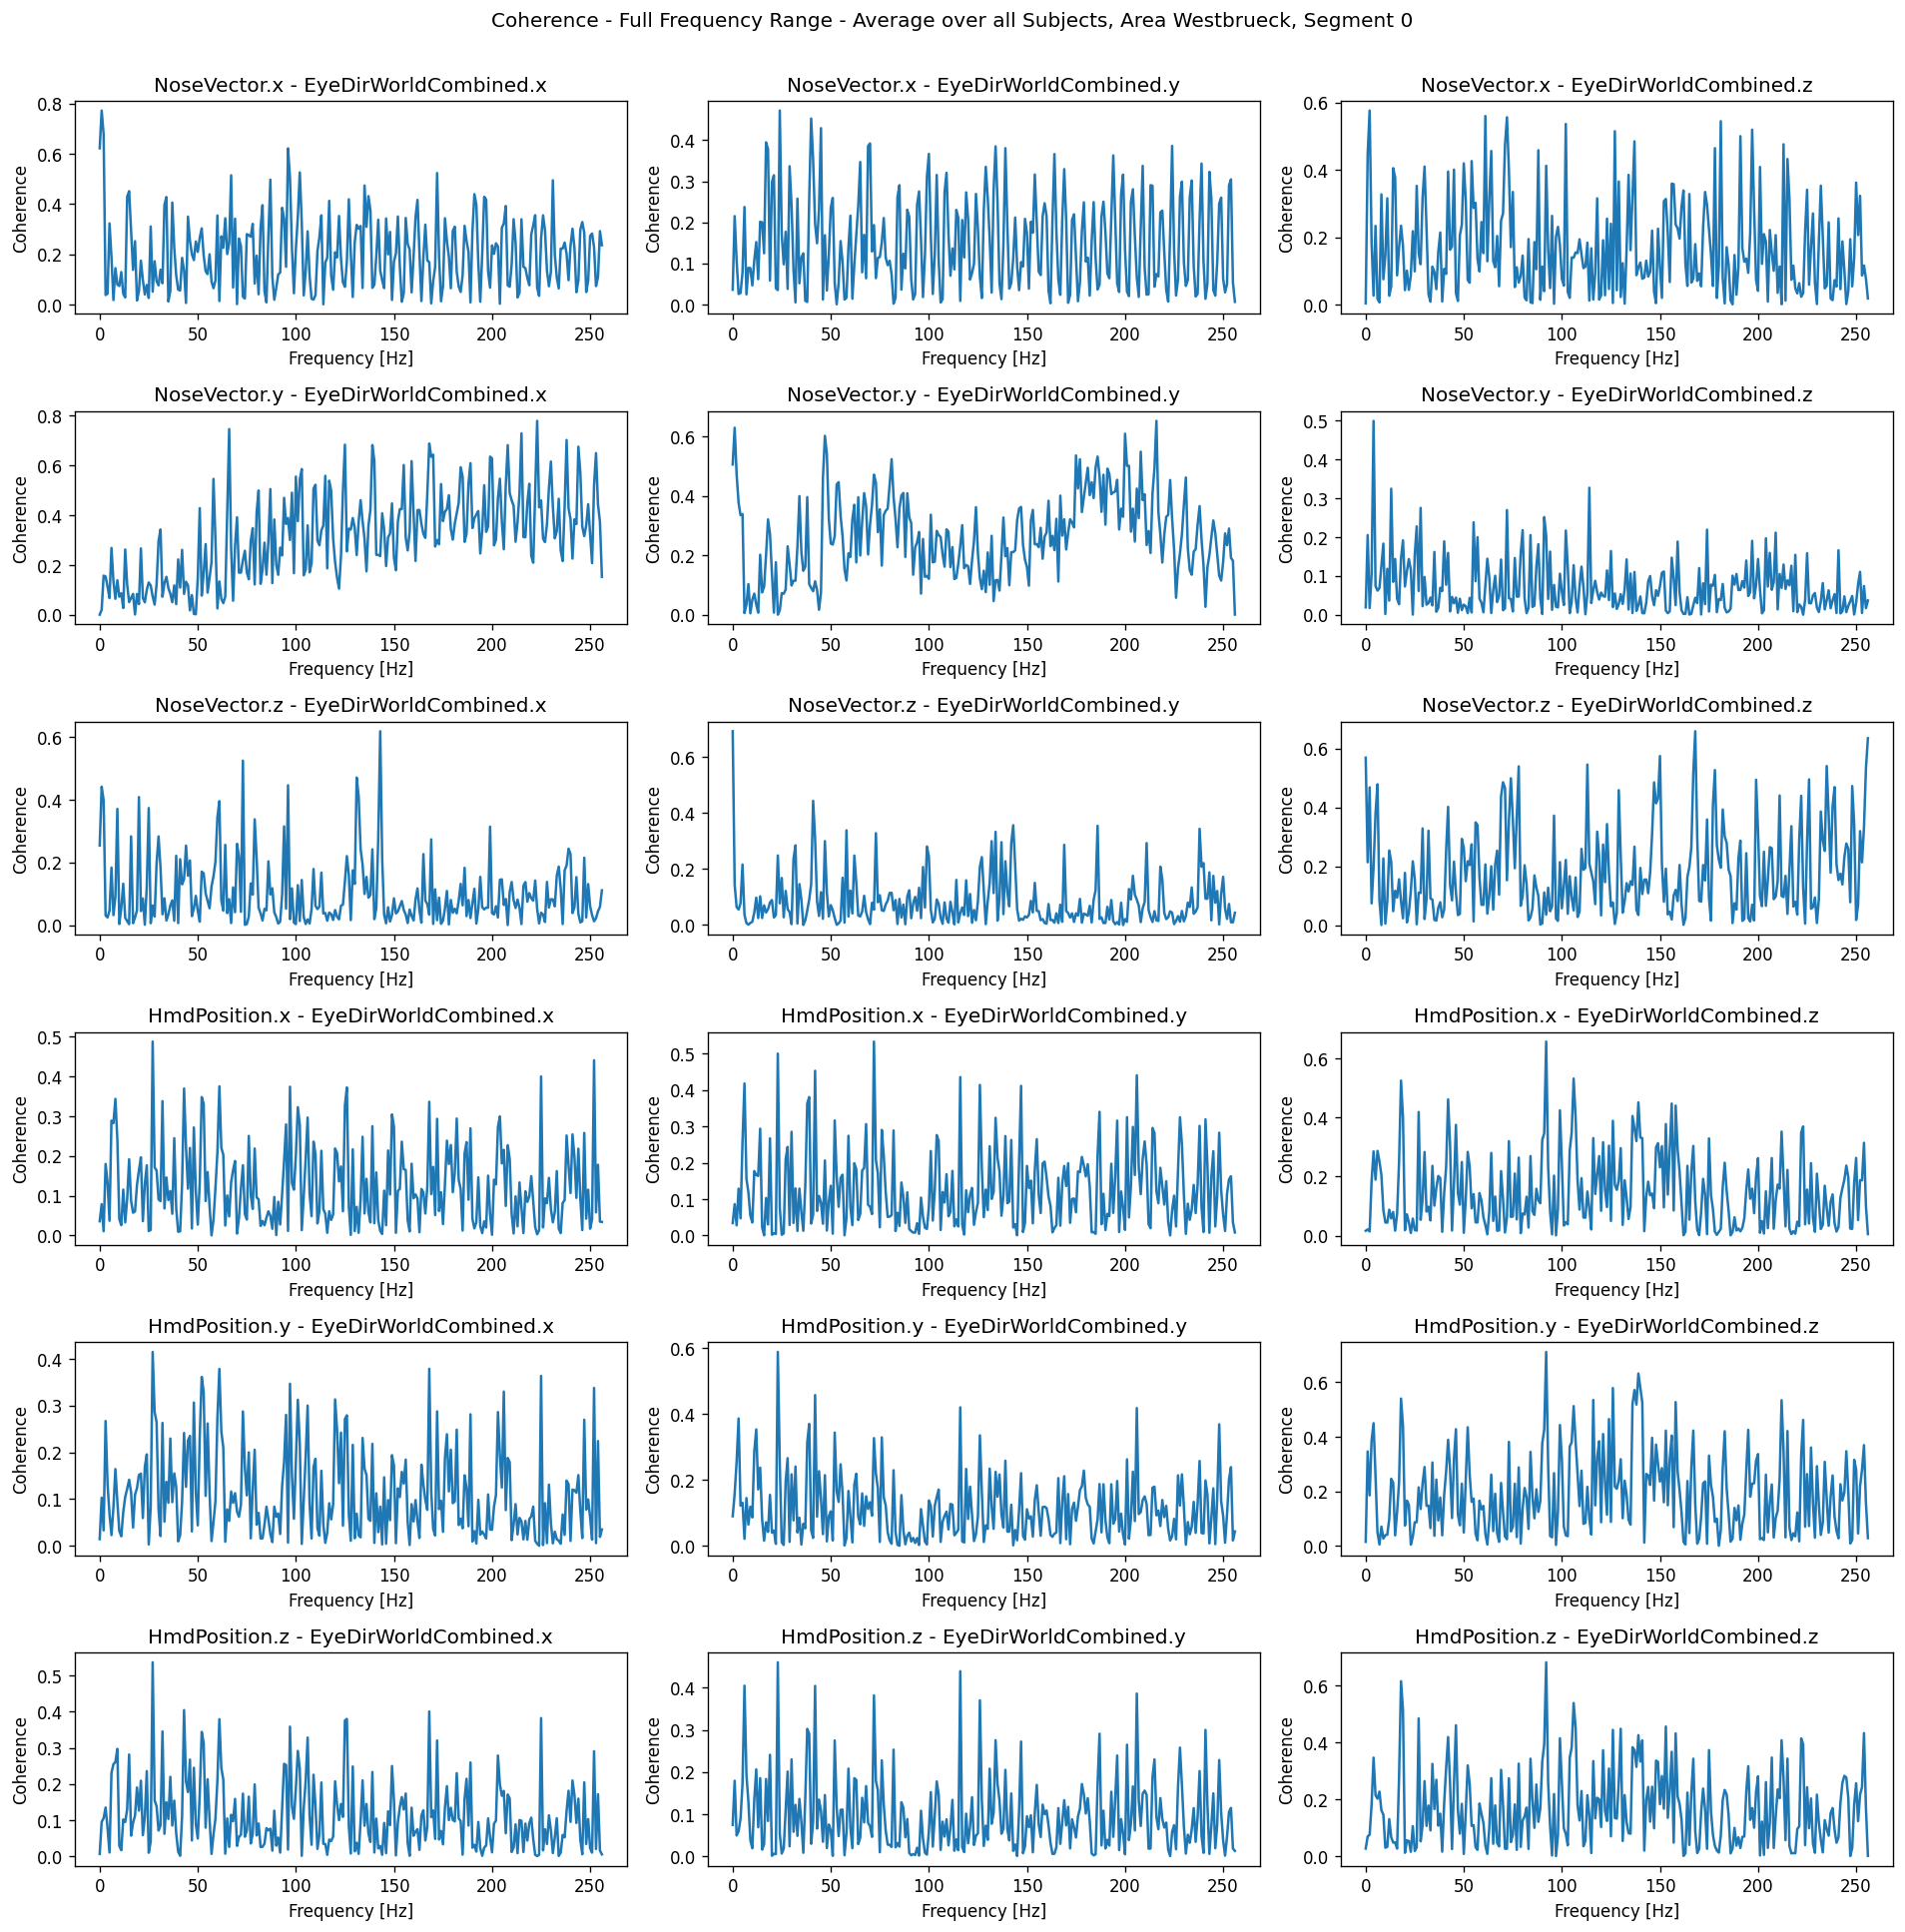

In [31]:
# Coherence - Full Frequency Range - Average over all Subjects

segment_data = average_over_all_participants_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z","HmdPosition.x","HmdPosition.x","HmdPosition.x","HmdPosition.y","HmdPosition.y","HmdPosition.y","HmdPosition.z","HmdPosition.z","HmdPosition.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 512 
plt_title = "Coherence - Full Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 6
ncols = 3
x_lim = -1
y_lim = -1 

plot_coherence(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)




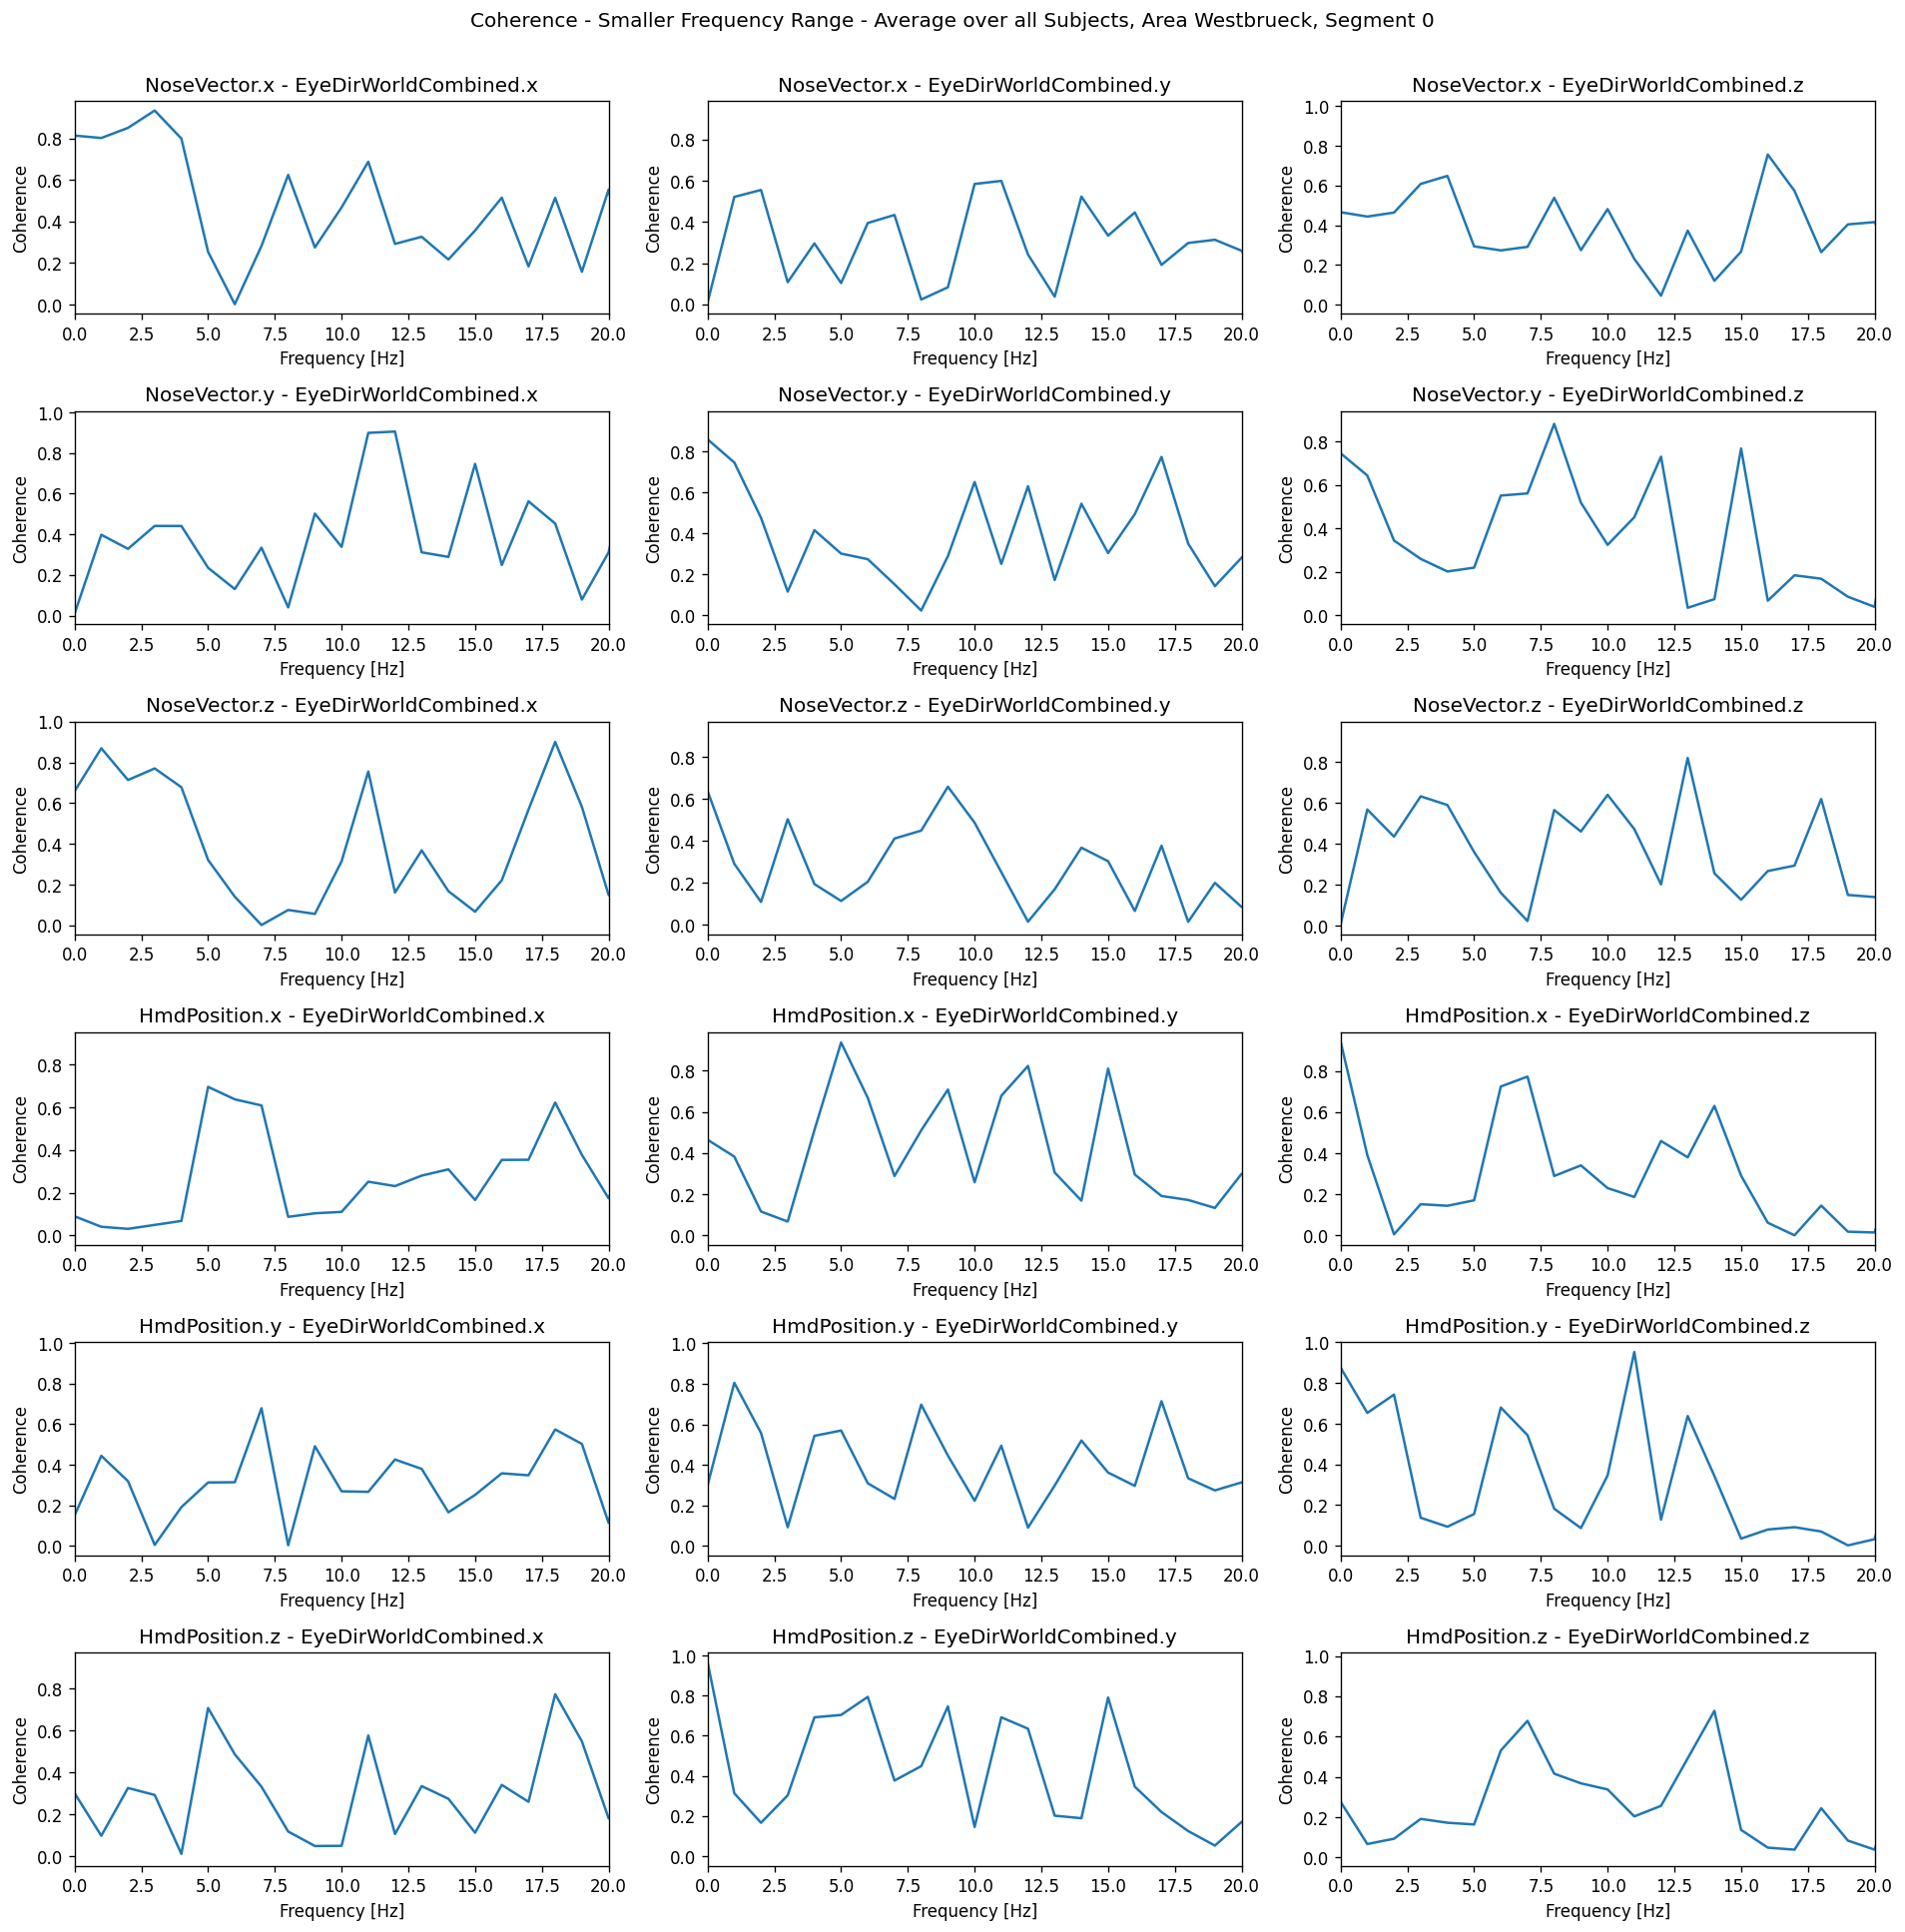

In [32]:
# Coherence - Smaller Frequency Range - Average over all Subjects

segment_data = average_over_all_participants_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z","HmdPosition.x","HmdPosition.x","HmdPosition.x","HmdPosition.y","HmdPosition.y","HmdPosition.y","HmdPosition.z","HmdPosition.z","HmdPosition.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 1024 
plt_title = "Coherence - Smaller Frequency Range - Average over all Subjects, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 6
ncols = 3
x_lim = 20
y_lim = -1 

plot_coherence(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)




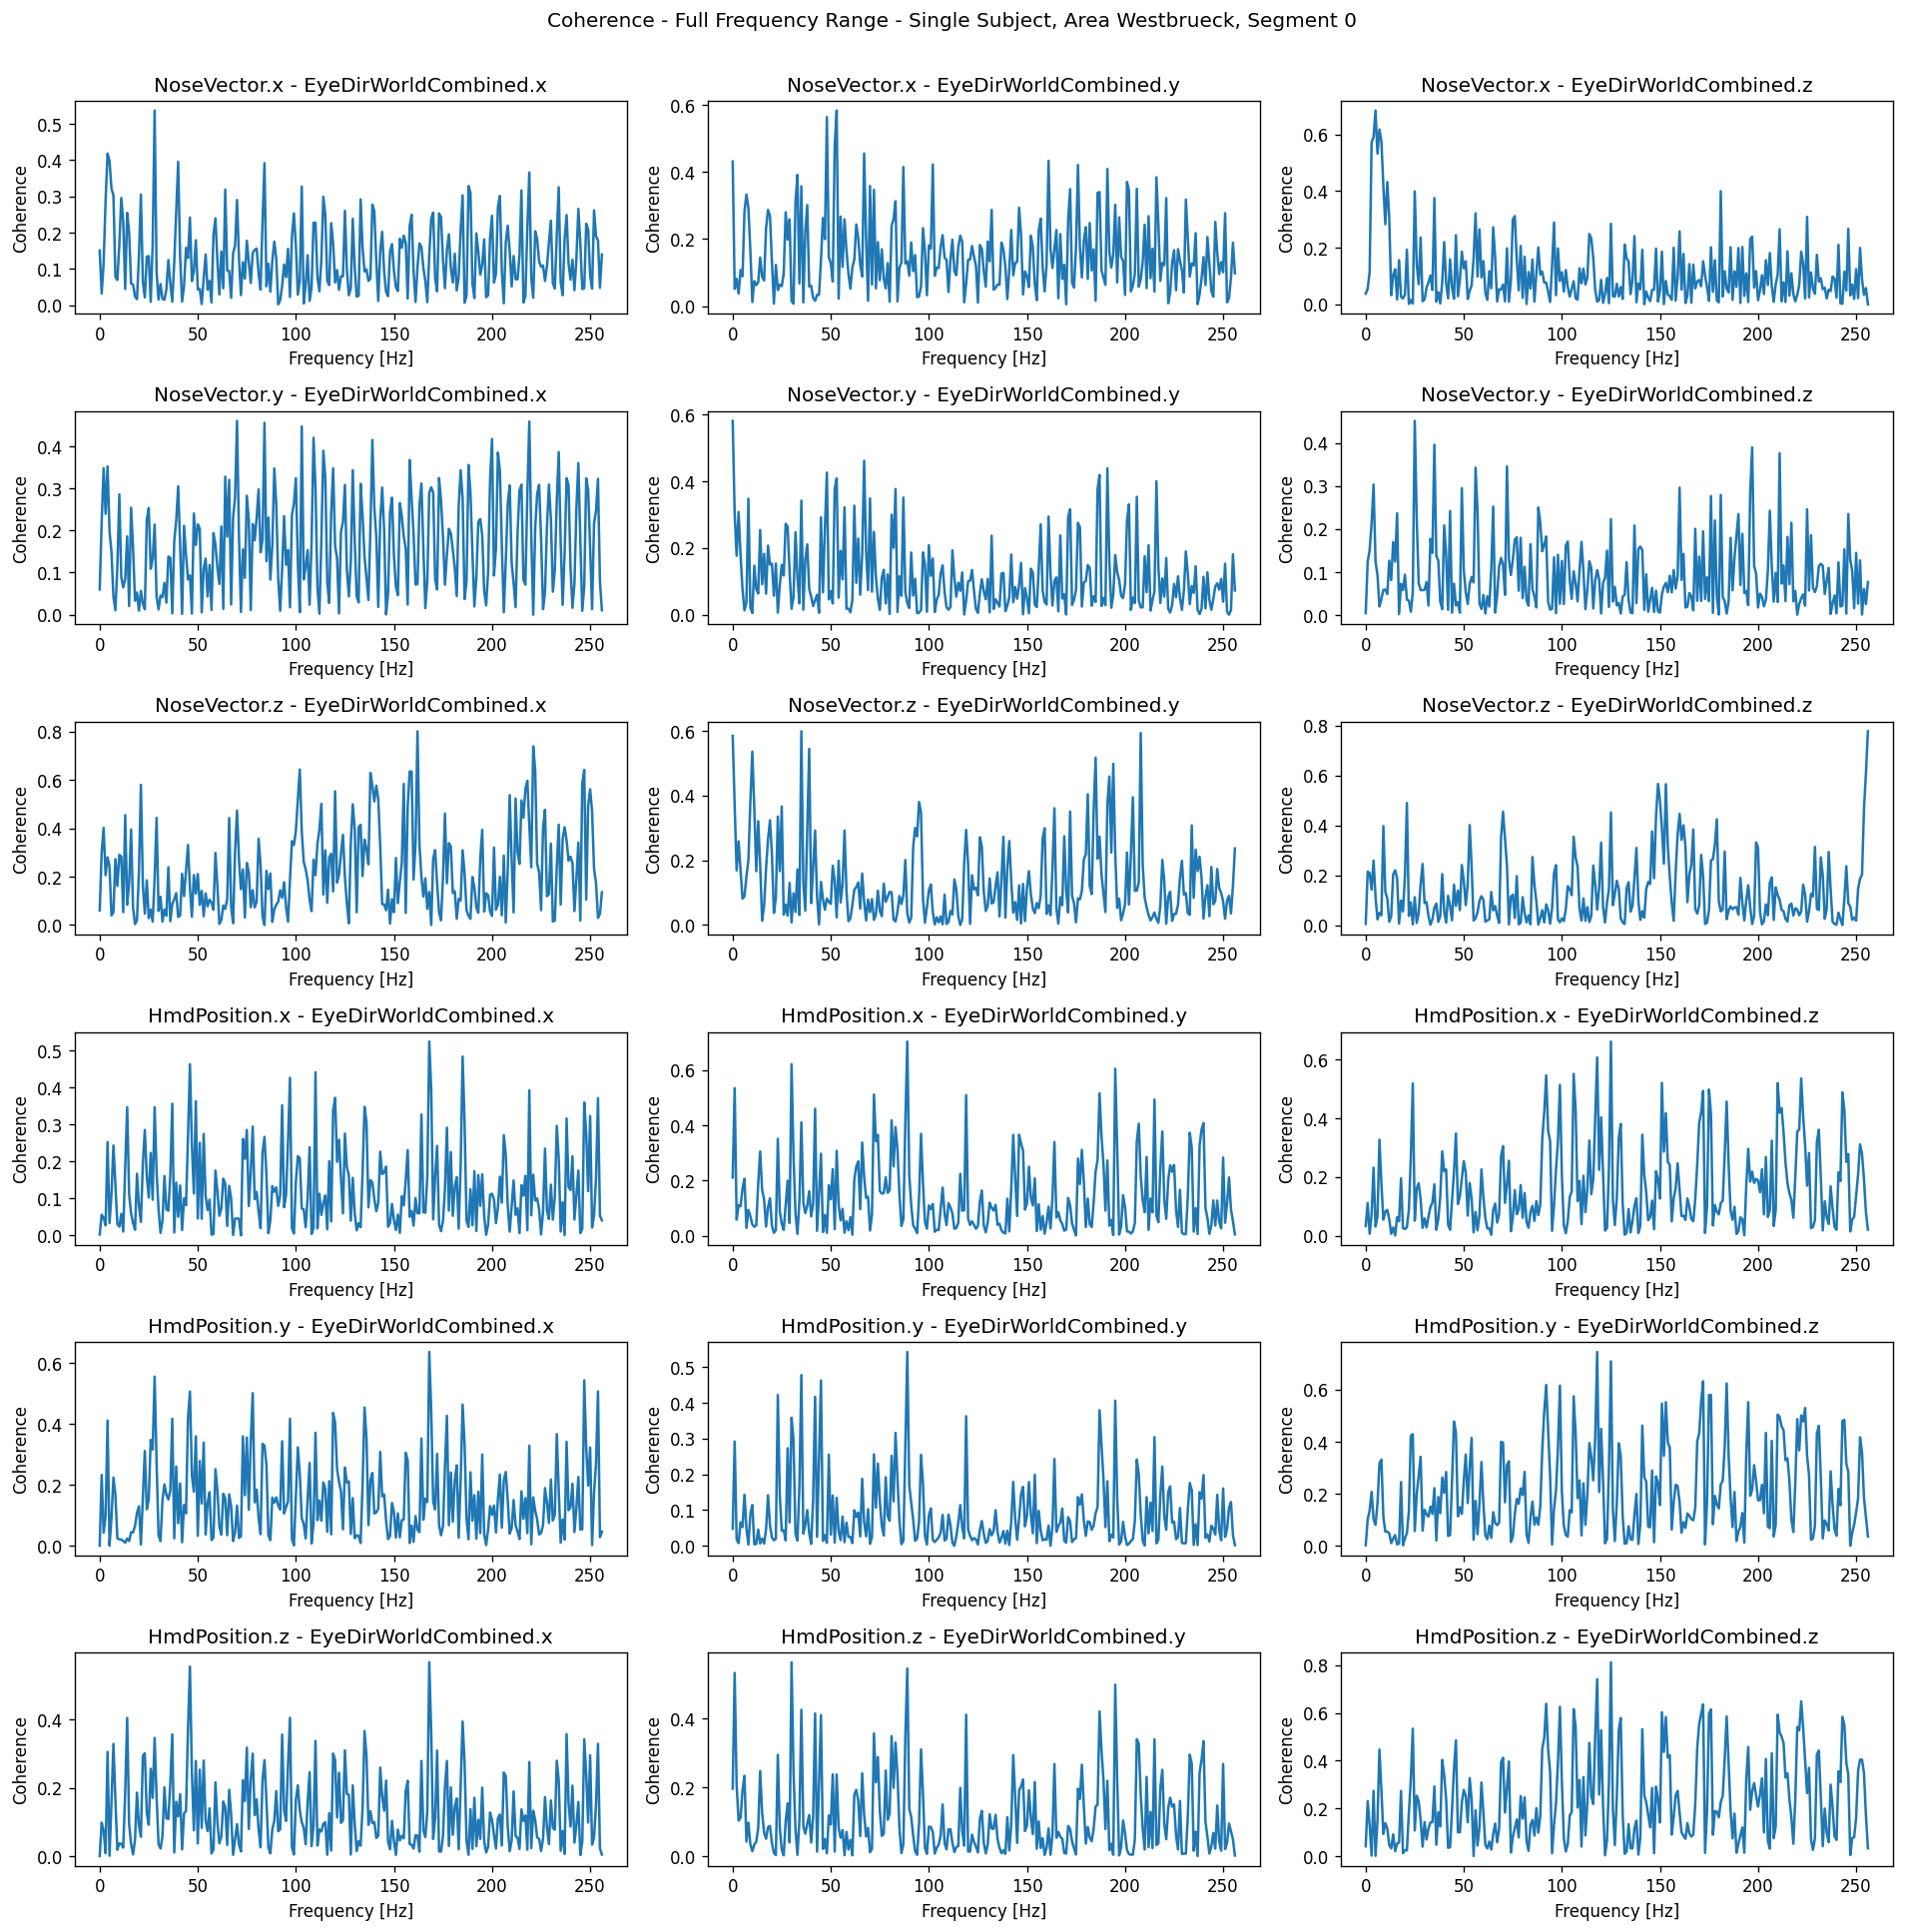

In [33]:
# Coherence - Full Frequency Range - Single subject

segment_data = one_participant_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z","HmdPosition.x","HmdPosition.x","HmdPosition.x","HmdPosition.y","HmdPosition.y","HmdPosition.y","HmdPosition.z","HmdPosition.z","HmdPosition.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 512 
plt_title = "Coherence - Full Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 6
ncols = 3
x_lim = -1
y_lim = -1 

plot_coherence(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)




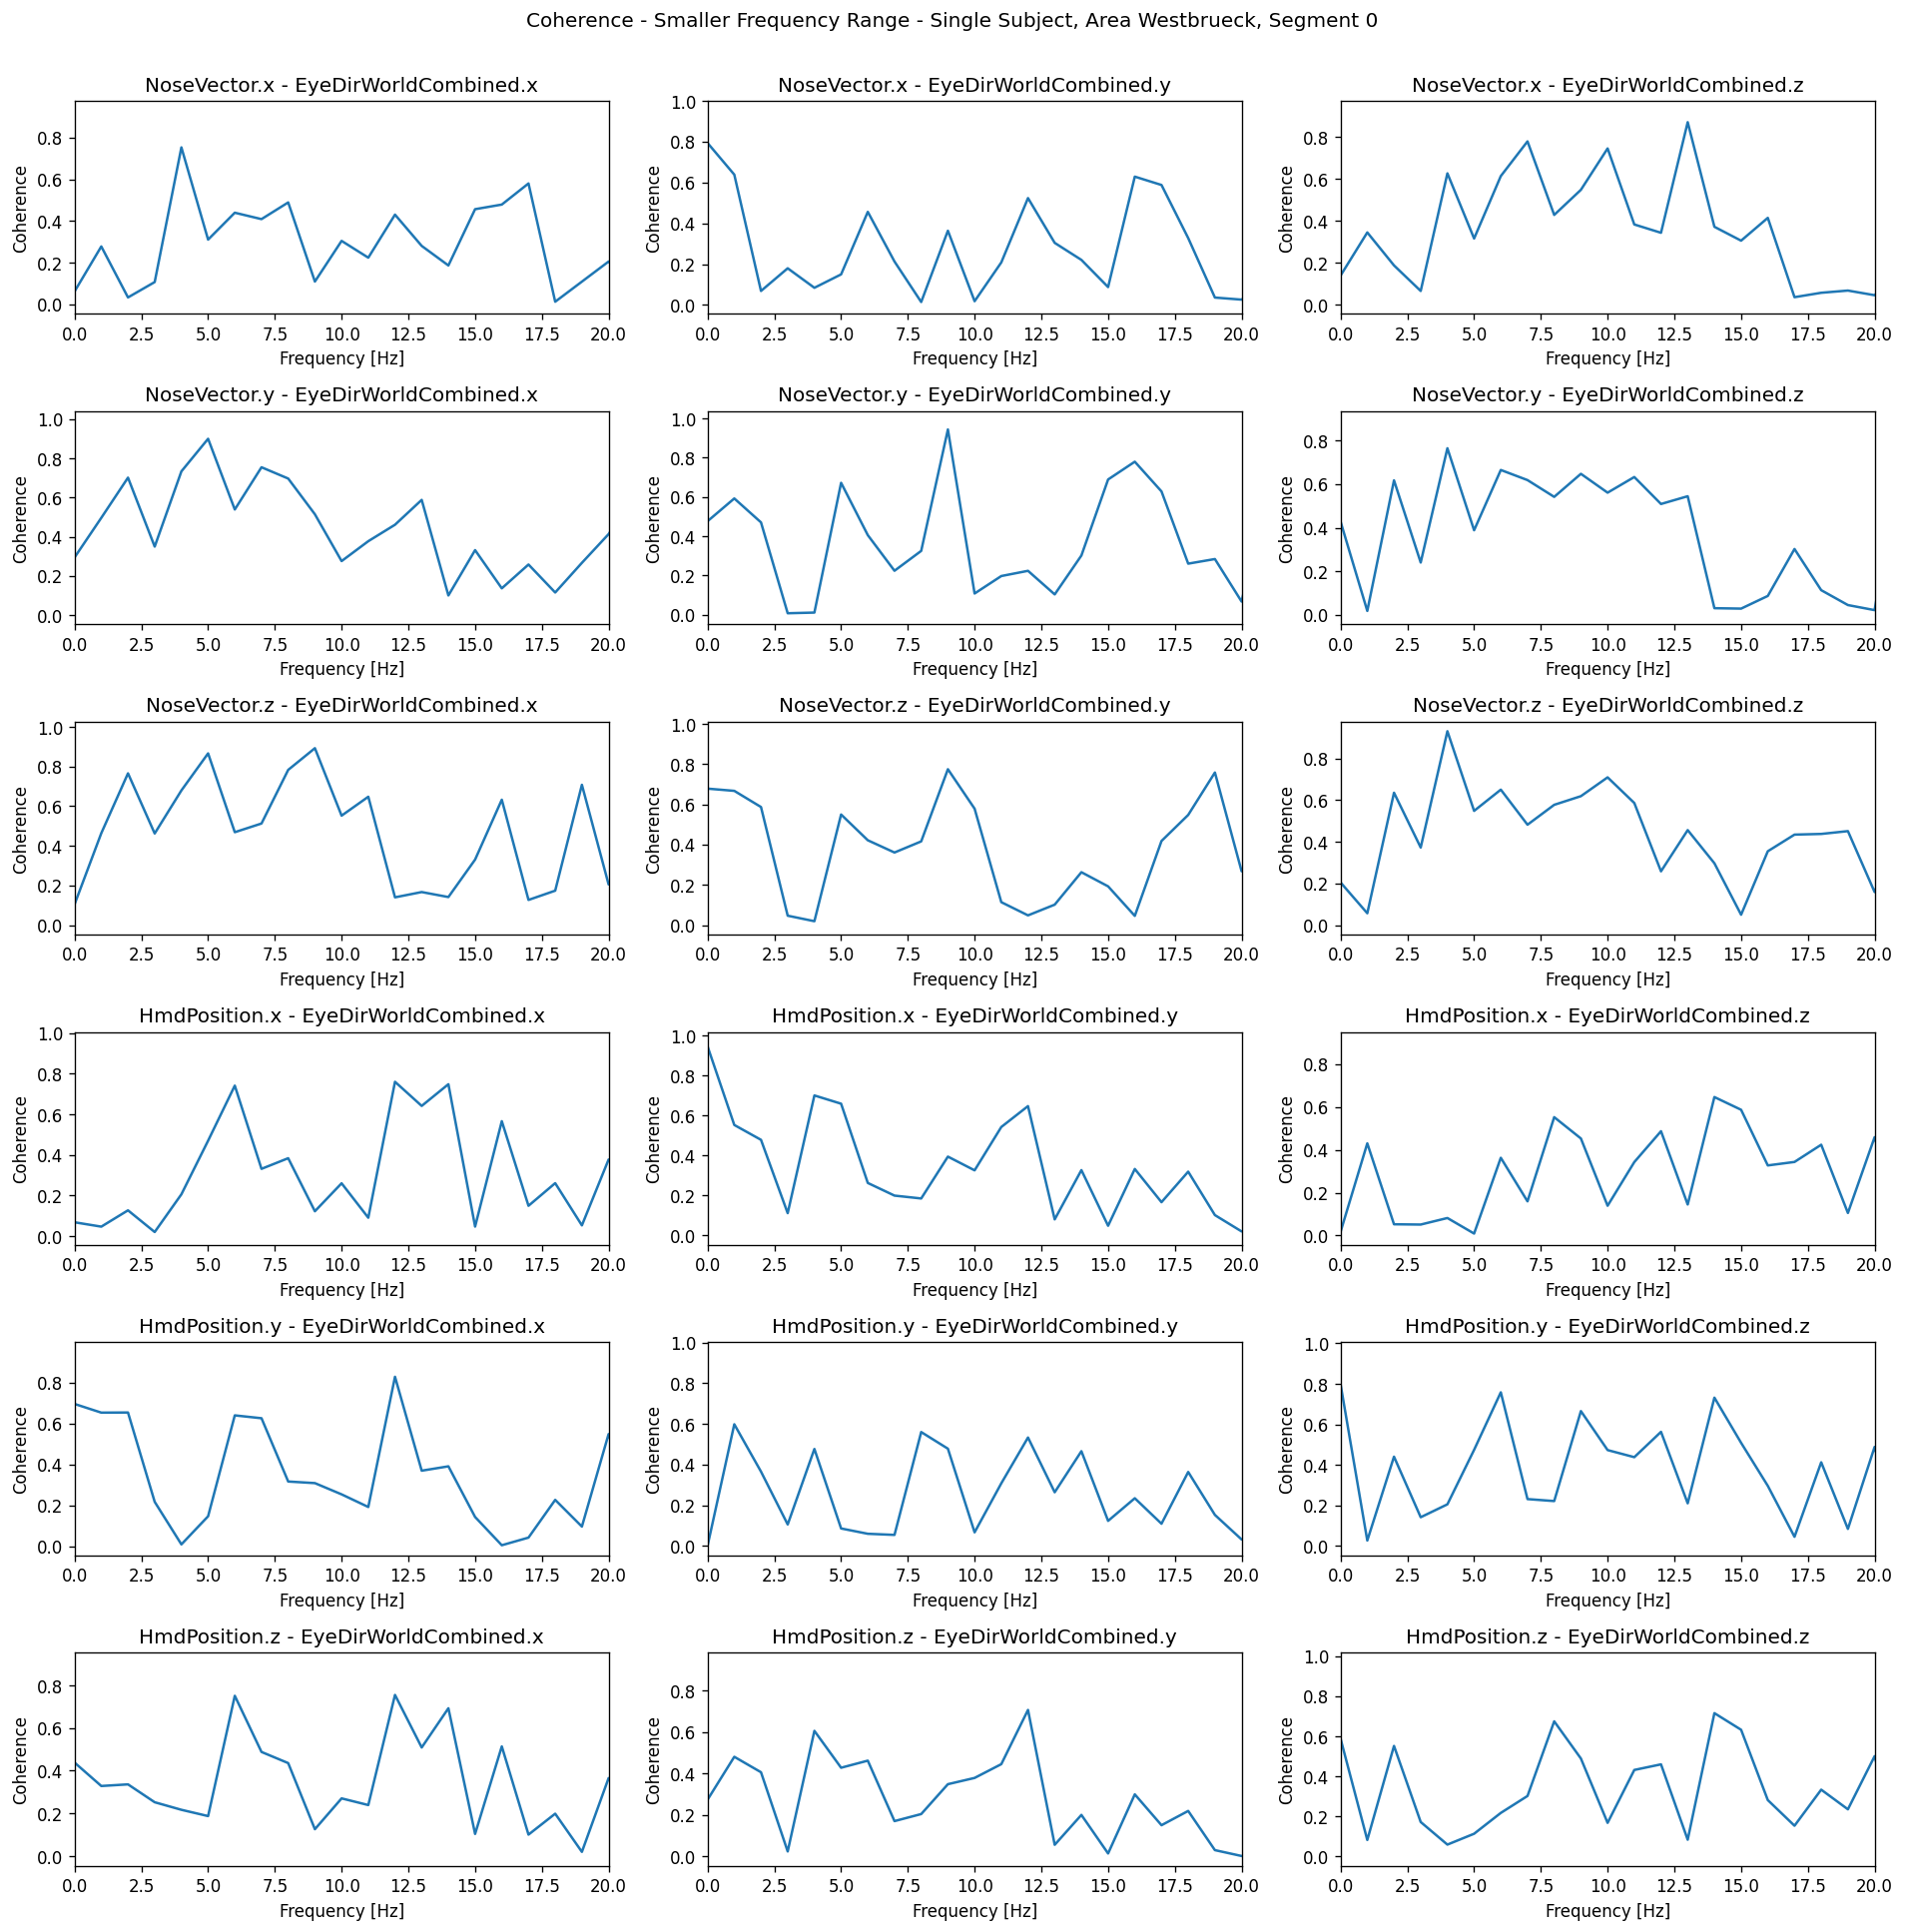

In [34]:
# Coherence - Smaller Frequency Range - Single subject

segment_data = one_participant_single_segment
names_x = ["NoseVector.x","NoseVector.x","NoseVector.x","NoseVector.y","NoseVector.y","NoseVector.y","NoseVector.z","NoseVector.z","NoseVector.z","HmdPosition.x","HmdPosition.x","HmdPosition.x","HmdPosition.y","HmdPosition.y","HmdPosition.y","HmdPosition.z","HmdPosition.z","HmdPosition.z"]
names_y = ["EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z","EyeDirWorldCombined.x","EyeDirWorldCombined.y","EyeDirWorldCombined.z"]
nperseg = 1024 
plt_title = "Coherence - Smaller Frequency Range - Single Subject, Area " + GLOBAL_AREA + ", Segment " + str(GLOBAL_SEGMENT)
figsize=(12,6)
nrows = 6
ncols = 3
x_lim = 20
y_lim = -1 

plot_coherence(segment_data,names_x,names_y,nperseg,plt_title,fig_size,nrows,ncols,x_lim,y_lim)



In [35]:
one_participant_single_segment

HmdPosition.x  HmdPosition.y  HmdPosition.z  NoseVector.x  NoseVector.y  \
0          0.905151       0.986206       0.341797      0.045545      0.314414   
1          0.905792       0.986412       0.342896      0.045278      0.313193   
2          0.906570       0.986832       0.344543      0.045037      0.311897   
3          0.907043       0.987122       0.345581      0.044860      0.310485   
4          0.907745       0.987663       0.347229      0.044684      0.309084   
...             ...            ...            ...           ...           ...   
2084       0.626536       1.005966      -0.043376      0.046852      0.307704   
2085       0.649343       1.004791      -0.025533      0.046039      0.308097   
2086       0.672150       1.003616      -0.007690      0.045226      0.308490   
2087       0.606842       1.007614      -0.058594      0.044445      0.308983   
2088       0.673523       1.003738      -0.006470      0.043934      0.309706   

      NoseVector.z  EyePosWorldCombined.x  EyePosWorldCombined.y  \
0         0.948193               0.918243               0.988144   
1         0.948610               0.919128               0.988358   
2         0.949048               0.920151               0.988785   
3         0.949519               0.921158               0.989059   
4         0.949984               0.922394               0.989586   
...            ...                    ...                    ...   
2084      0.950328               0.641408               1.007945   
2085      0.950240               0.664012               1.006673   
2086      0.950152               0.686615               1.005402   
2087      0.950029               0.620895               1.009529   
2088      0.949817               0.687164               1.005783   

      EyePosWorldCombined.z  EyeDirWorldCombined.x  EyeDirWorldCombined.y  \
0                  0.370483              -0.029951               0.114491   
1                  0.371216              -0.029669               0.113254   
2                  0.372498              -0.029363               0.111941   
3                  0.372803              -0.030387               0.109005   
4                  0.373718              -0.031402               0.106079   
...                     ...                    ...                    ...   
2084              -0.015584               0.075994               0.100736   
2085               0.002706               0.075697               0.101164   
2086               0.020996               0.075401               0.101592   
2087              -0.029114               0.073083               0.098187   
2088               0.023804               0.070978               0.095013   

      EyeDirWorldCombined.z  EyePosLocalCombined.x  EyePosLocalCombined.y  \
0                  0.992973               0.001685               0.003763   
1                  0.993123               0.001229               0.003744   
2                  0.993281               0.000773               0.003725   
3                  0.993577              -0.000164               0.003689   
4                  0.993862              -0.001101               0.003654   
...                     ...                    ...                    ...   
2084               0.992007               0.002051               0.003975   
2085               0.991986               0.002622               0.003997   
2086               0.991965               0.003194               0.004019   
2087               0.992481               0.004149               0.004053   
2088               0.992942               0.005104               0.004087   

      EyePosLocalCombined.z  EyeDirLocalCombined.x  EyeDirLocalCombined.y  \
0                 -0.033151              -0.088638              -0.199326   
1                 -0.033073              -0.088036              -0.199593   
2                 -0.032995              -0.087433              -0.199860   
3                 -0.032832              -0.088242        